In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from functools import reduce
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('..')

In [3]:
categories = ['harm', 'authority', 'fairness', 'loyalty', 'purity']

In [4]:
ages = range(1, 7)

In [5]:
def get_df(labels_utterances, has_probs = False):
    df = pd.DataFrame()
    columns = ['label', 'context', 'x', 'y']
    labels = []
    context = []
    x = []
    y = []
    for l, d in labels_utterances.items():
        for c , probs, pos in d:


            labels.append(str(l))
            context.append(c)
            x.append(pos[0])
            y.append(pos[1])
            if has_probs:
                #TODO
                pass

    df['label'] = labels
    df['context'] = context
    df['x'] = x
    df['y'] = y
    return df
        
    
        
    

In [6]:
def find_distance_to_center(center_x, center_y):
    def function(row):
        x = row['x']
        y = row['y']
        center = np.array([center_x, center_y])
        pos = np.array([x, y])
        
        cos_distance = distance.cosine(center, pos)
        
        return cos_distance
    return function

In [7]:
def plot_clustering(df, age, c, n = 3):
    fig, ax = plt.subplots(figsize = (15, 10))
    
    sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'label', ax = ax)
    
    
    labels = df.label.unique()
    for l in labels:
        new_df = df.loc[df.label == l]
        center_x = np.array(new_df['x']).mean()
        center_y = np.array(new_df['y']).mean()
        
        distance_function = find_distance_to_center(center_x, center_y)
        new_df['distance'] = new_df.apply(distance_function, axis = 1)
        new_df = new_df.sort_values(by = 'distance')
        closest = new_df.iloc[:n]
        
        for i , row in closest.iterrows():
            x = row['x']
            y = row['y']
            
            ax.text(x, y, row['context'], horizontalalignment='left', size='medium', color='black', weight='semibold')
            
        if len(new_df) - n >= 1:
            random_utterance_index = np.random.choice(len(new_df) - n)

            x  = new_df.iloc[random_utterance_index + n]['x']
            y = new_df.iloc[random_utterance_index + n]['y']
            ax.text(x, y, new_df.iloc[random_utterance_index + n]['context'], horizontalalignment='left', size='medium', color='black', weight='semibold')


    
    ax.set_title(f'clustering for children aged {age} on {c}')
    plt.show()
    
        
    

## Metric to choose number of clusters  : Silhouette score

#  Kmeans

In [8]:
model_name = 'Kmeans'

(9, 0.3835273)


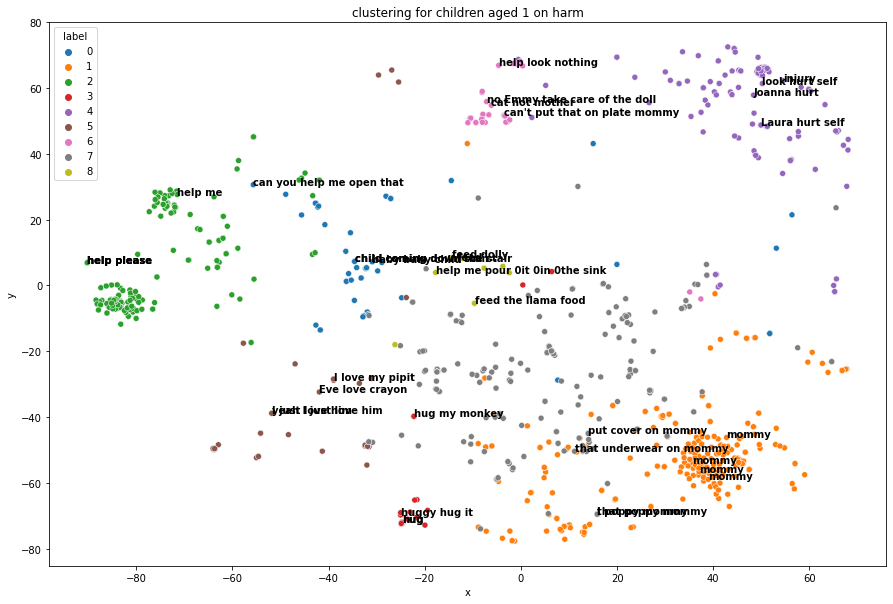

(6, 0.20536321)


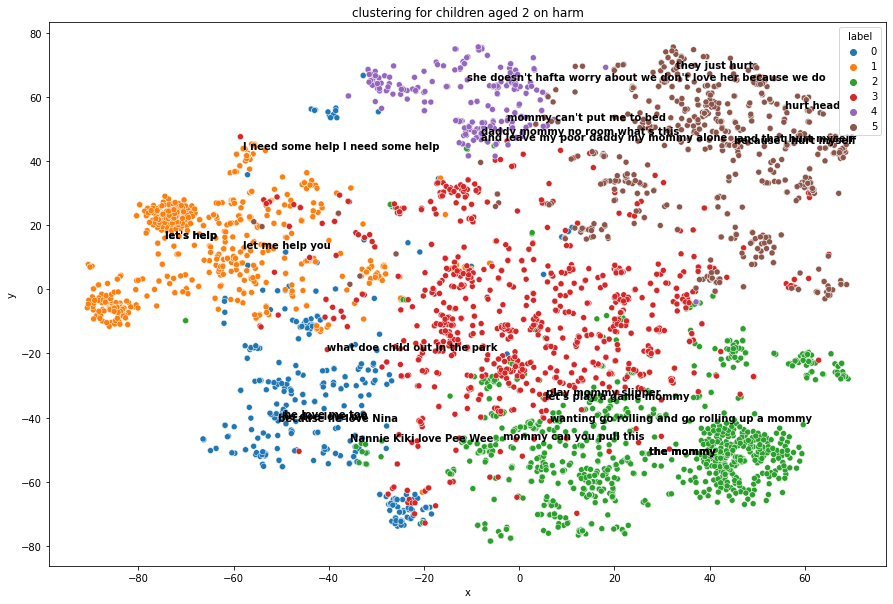

(5, 0.14843275)


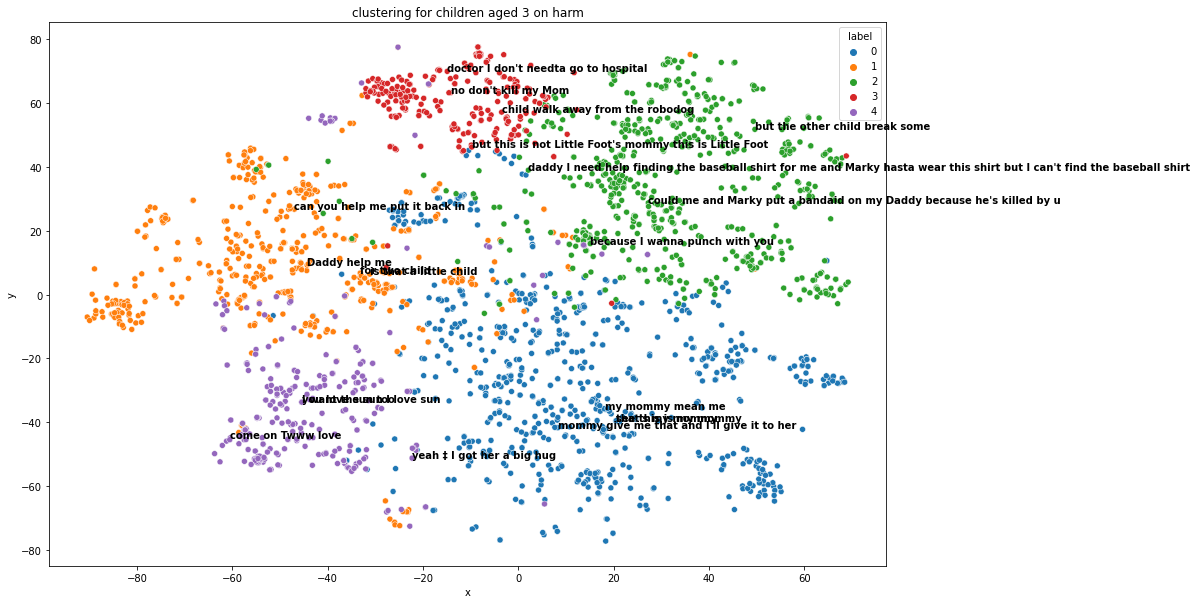

(10, 0.14616832)


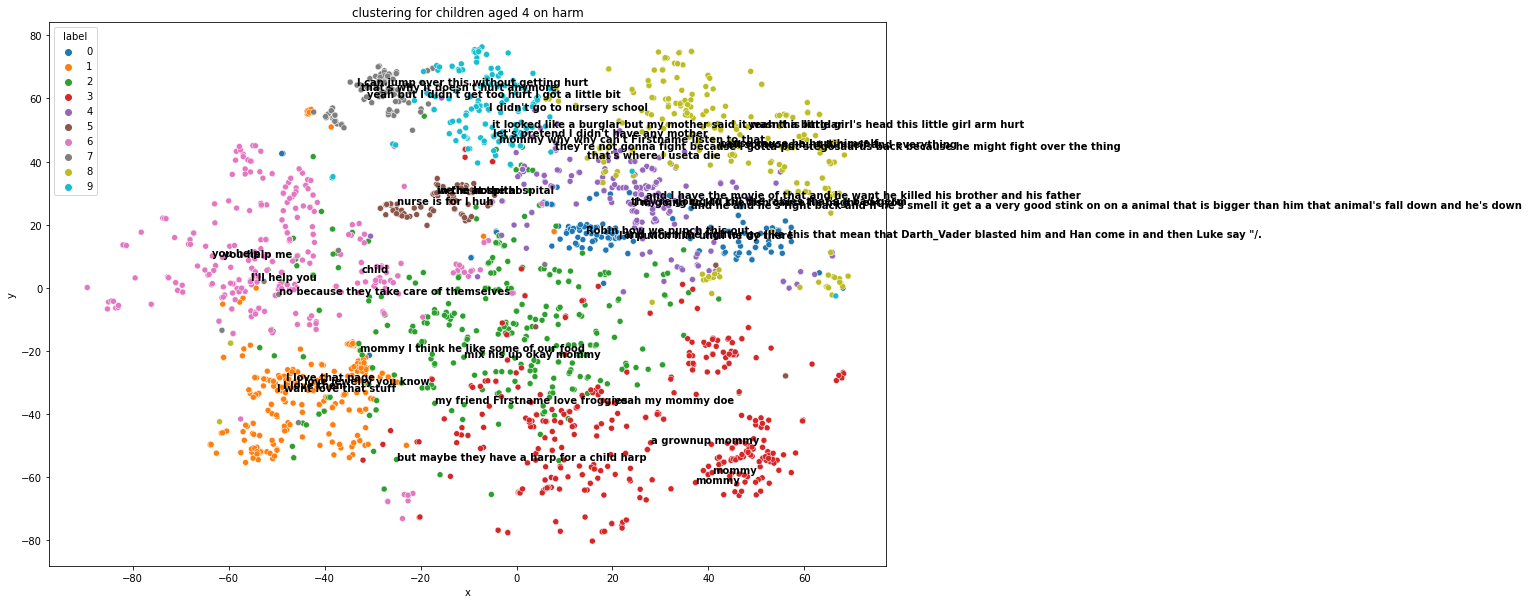

(8, 0.17449461)


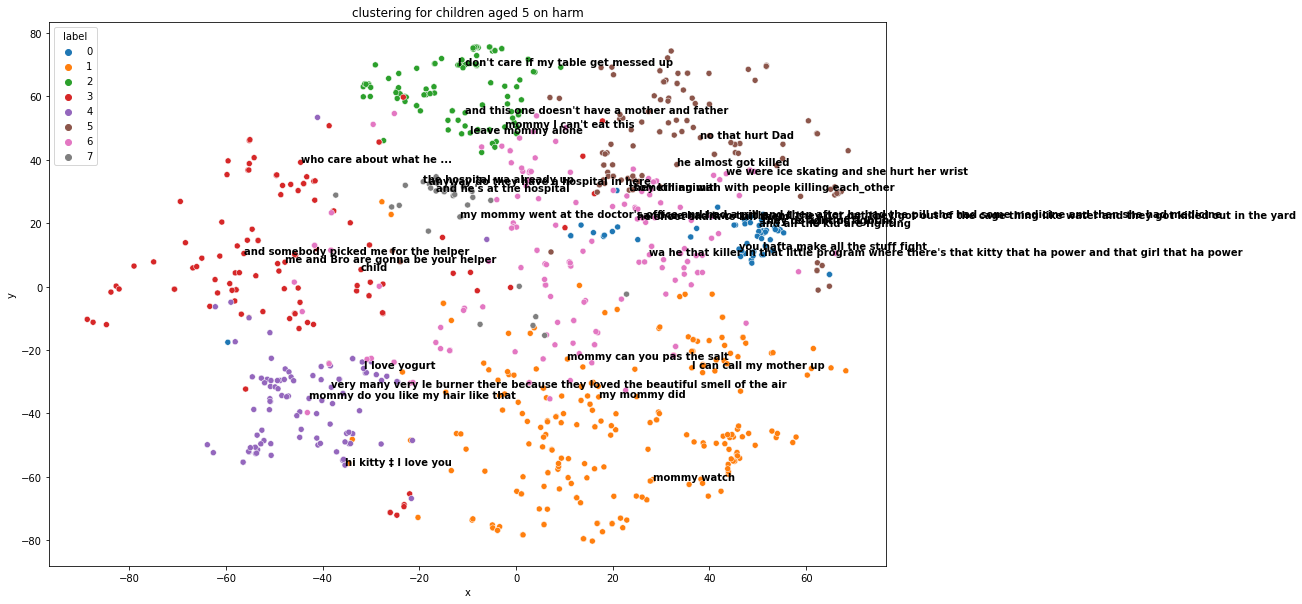

(10, 0.16667673)


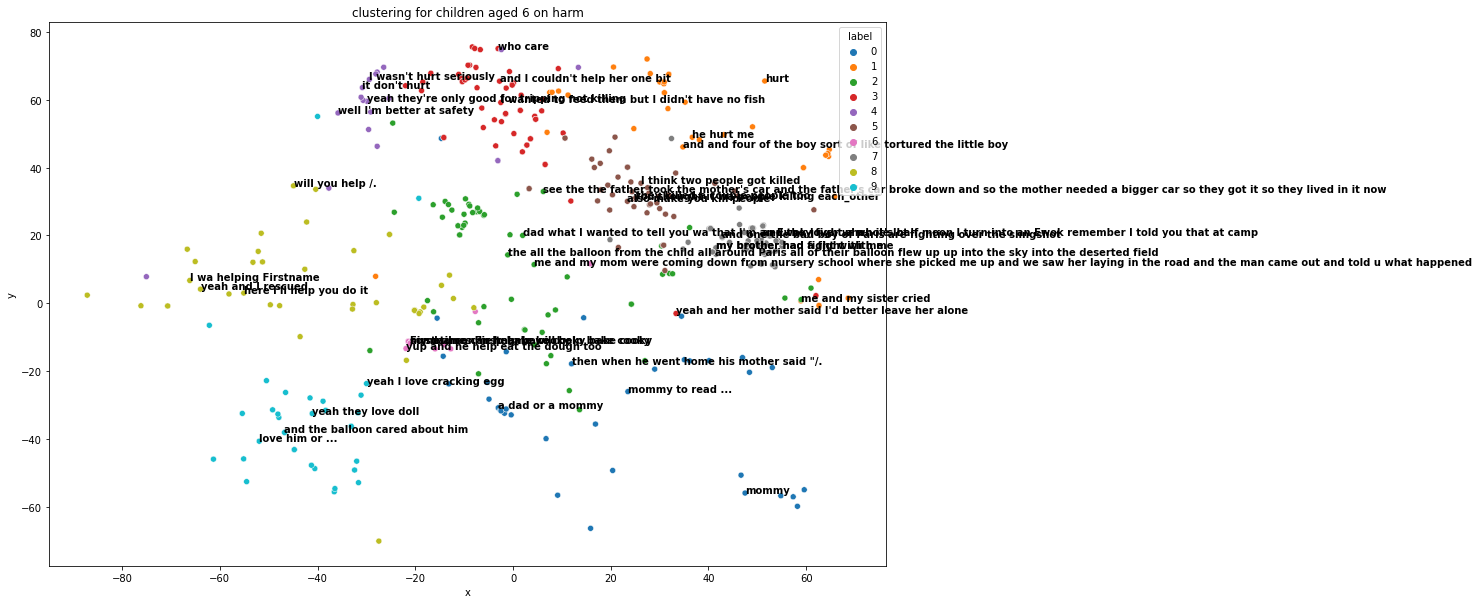

(2, 0.14815533)


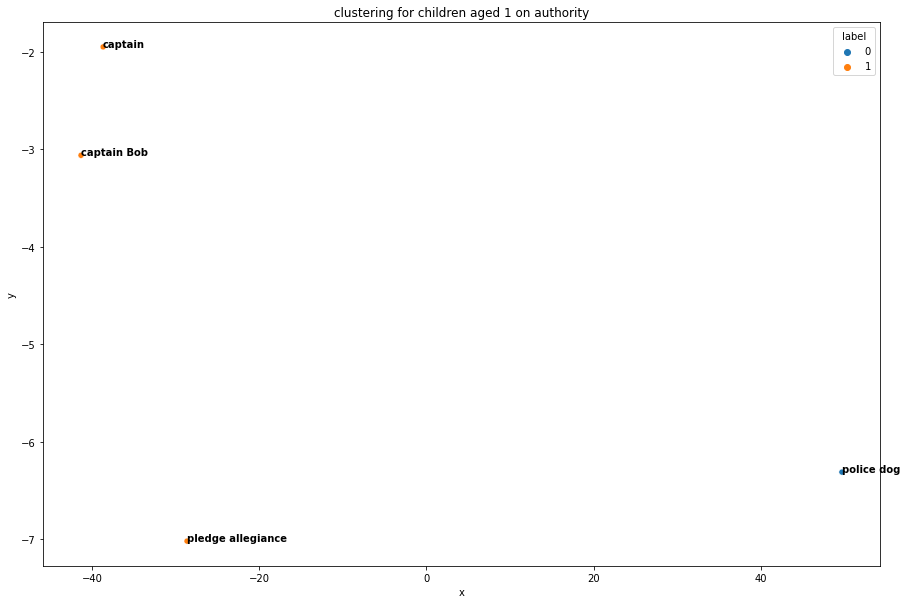

(5, 0.22706129)


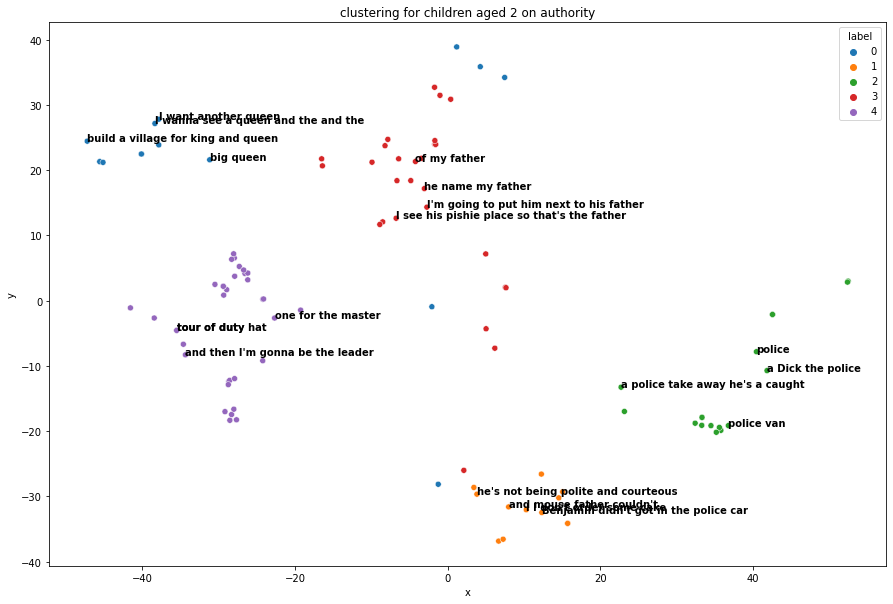

(10, 0.1779837)


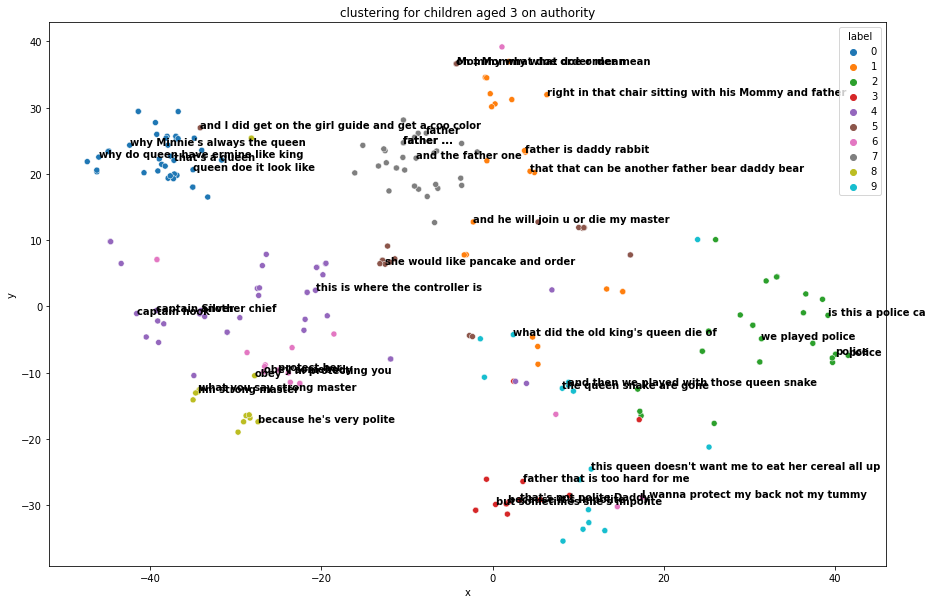

(5, 0.18134038)


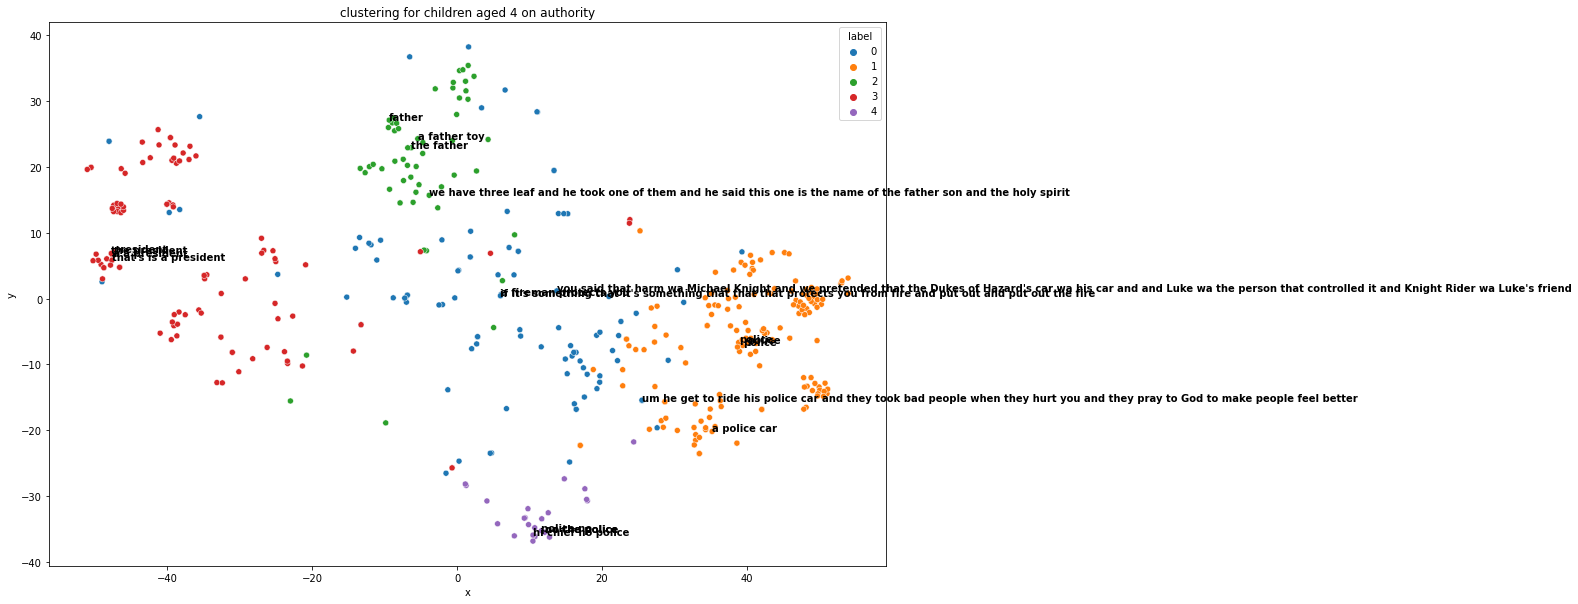

(10, 0.15527858)


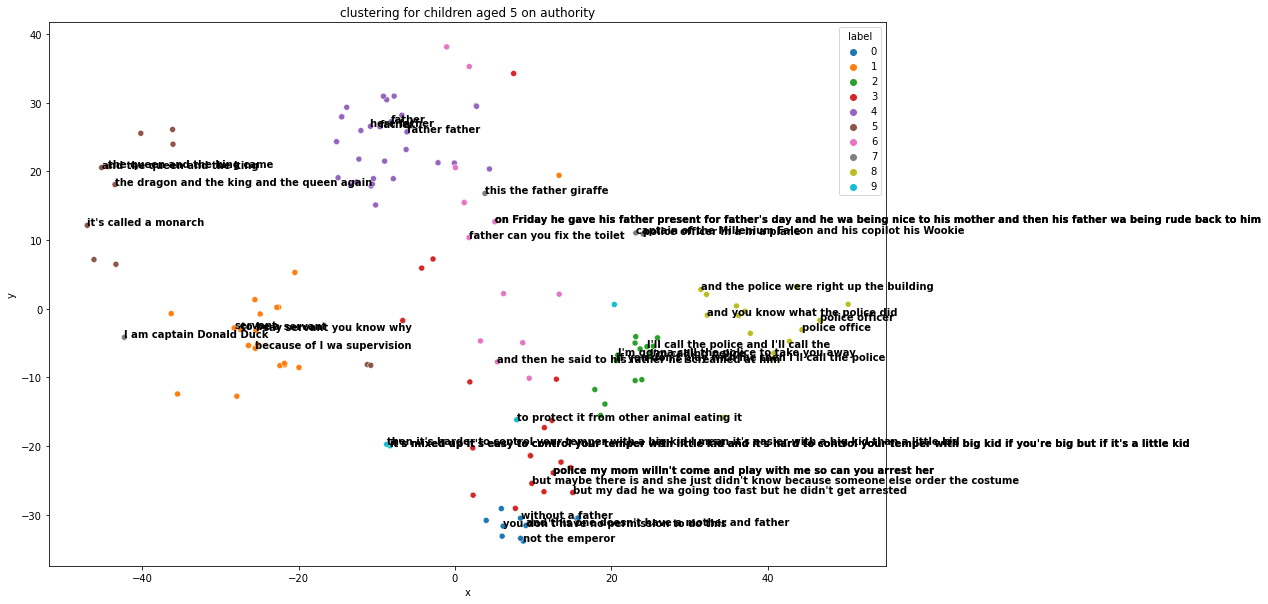

(4, 0.18402782)


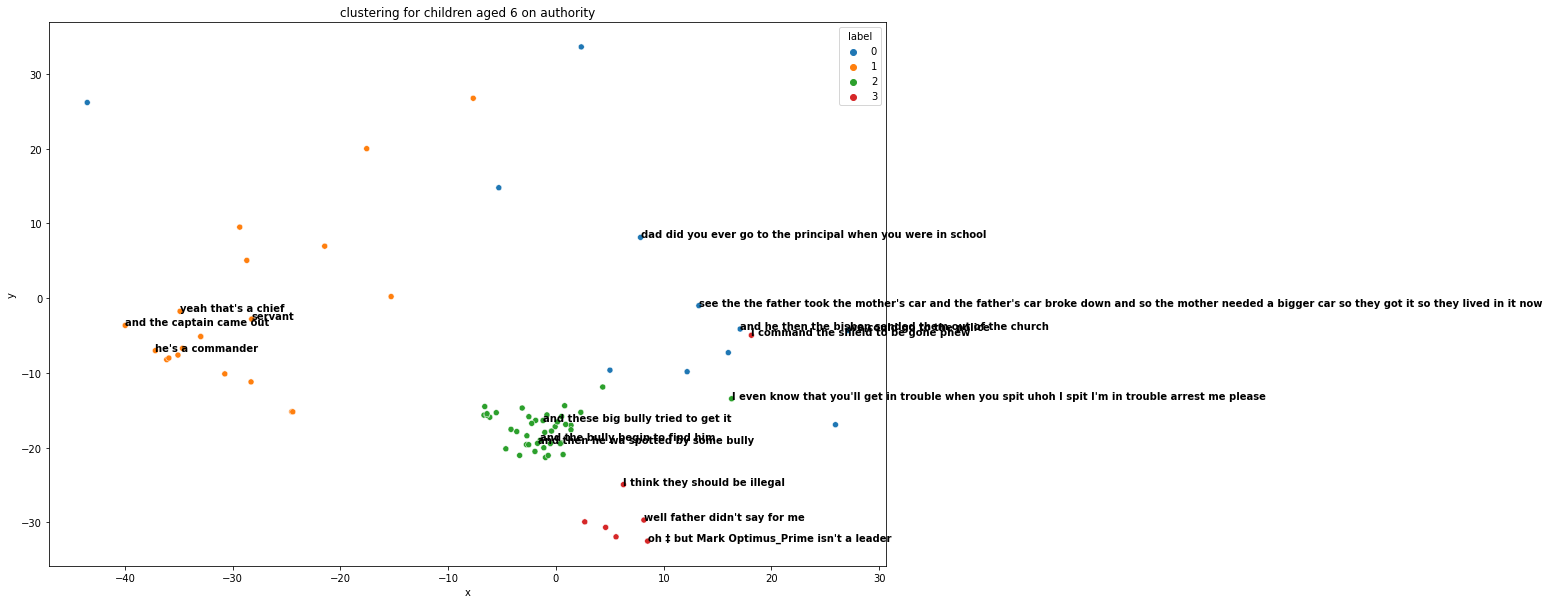

(2, 0.49683014)


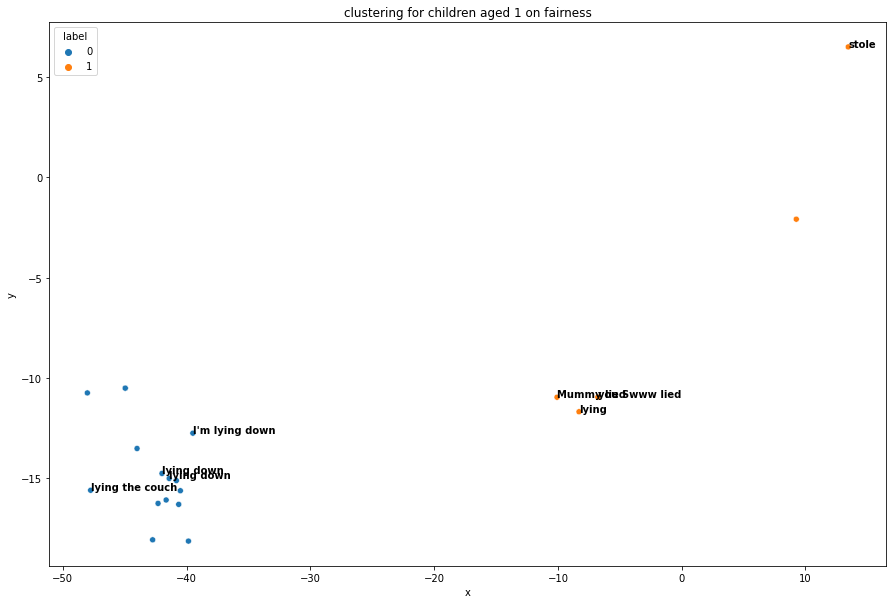

(4, 0.33145353)


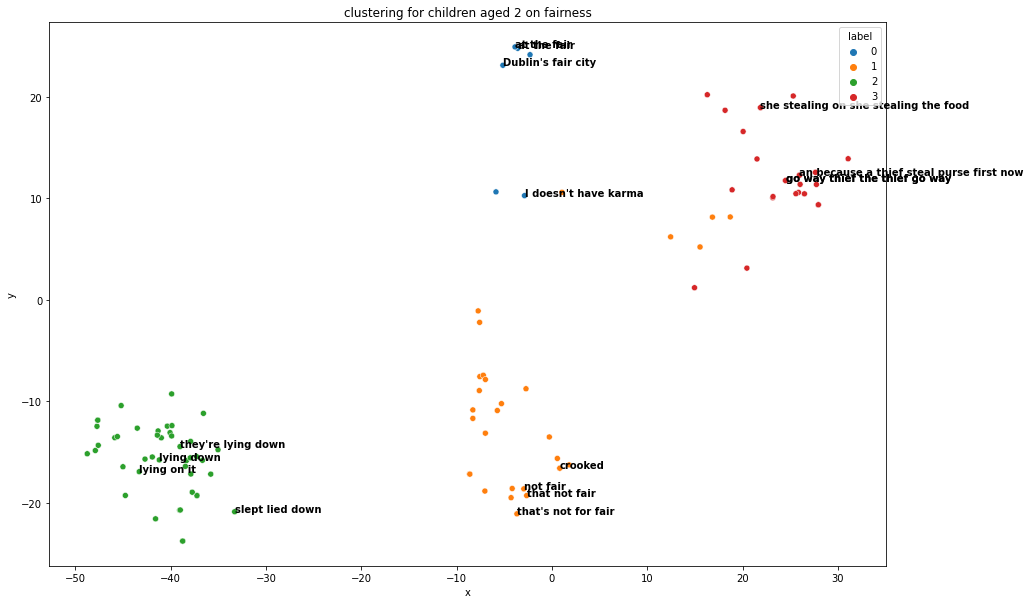

(5, 0.20845877)


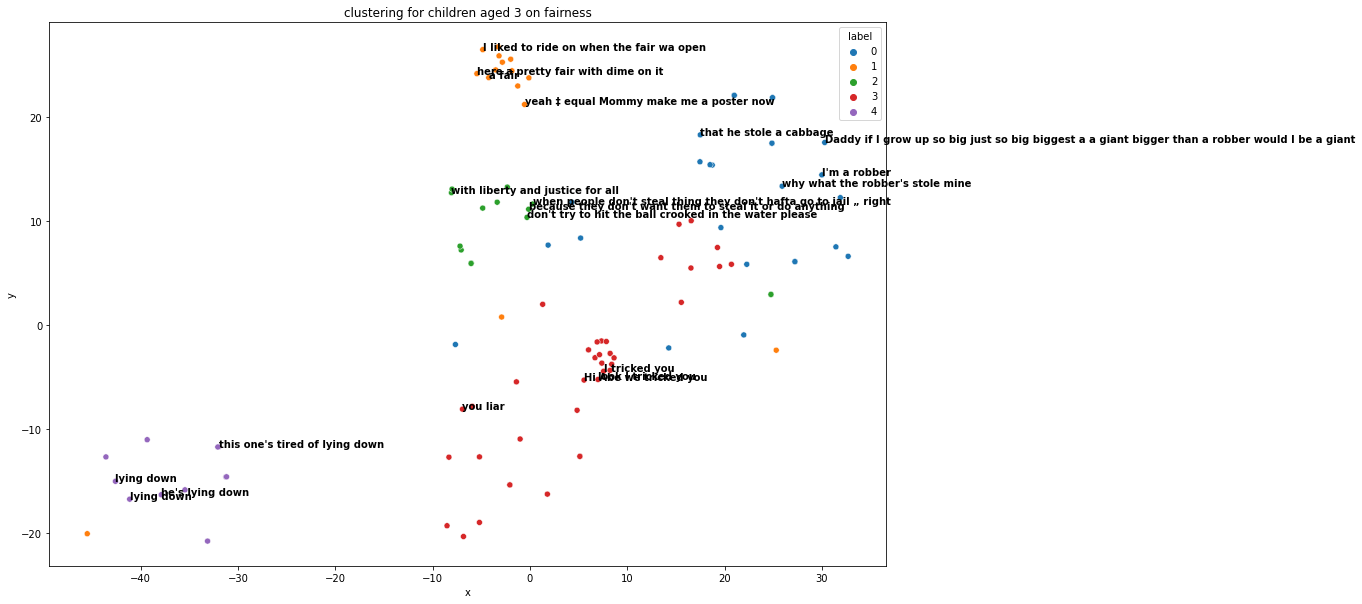

(3, 0.19485074)


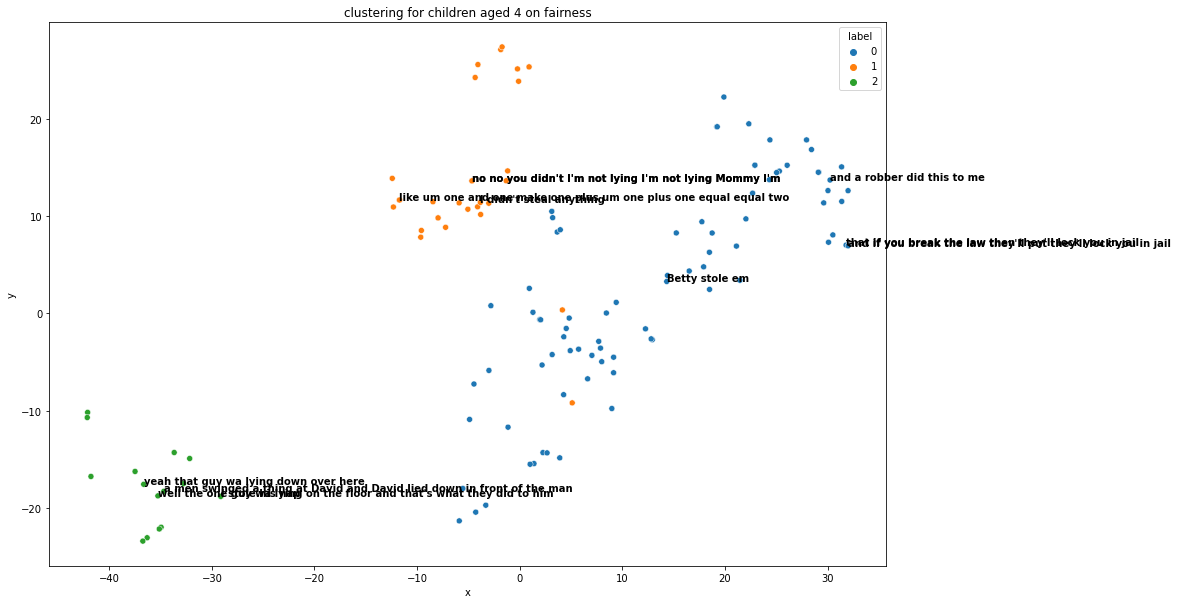

(9, 0.20022985)


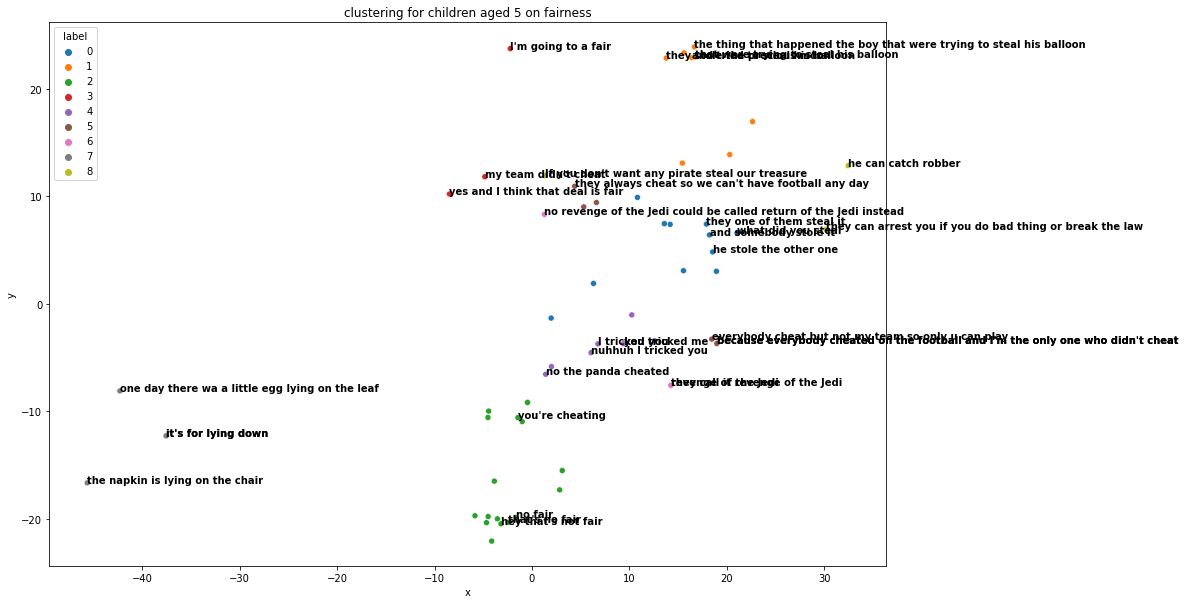

(10, 0.21729833)


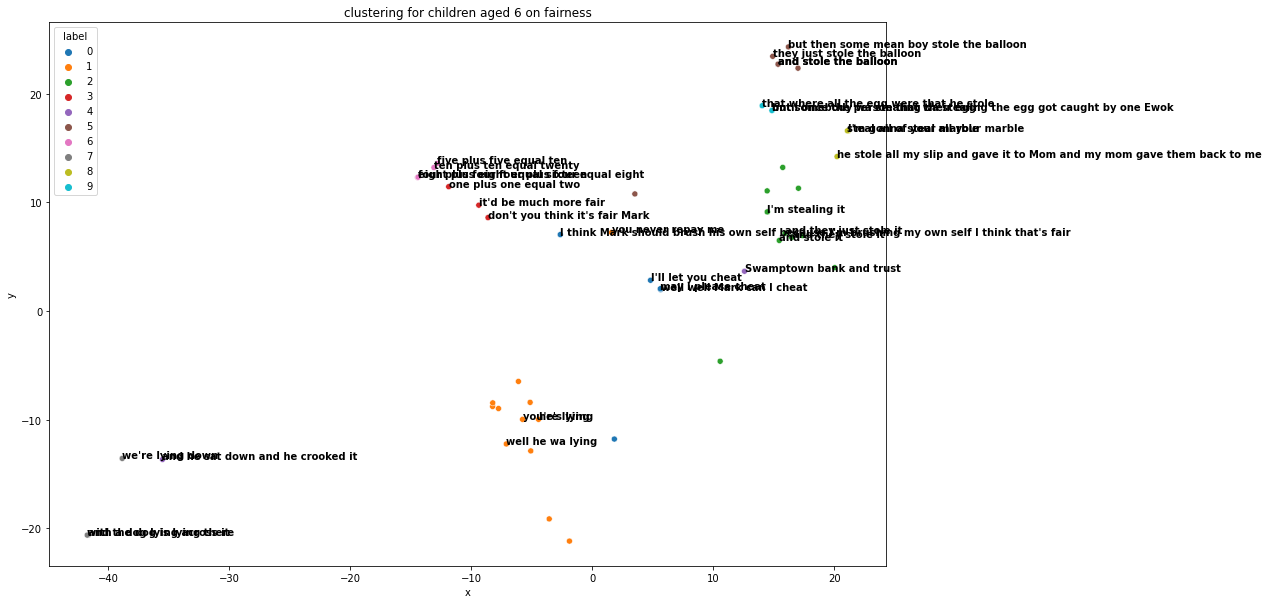

(9, 0.46578306)


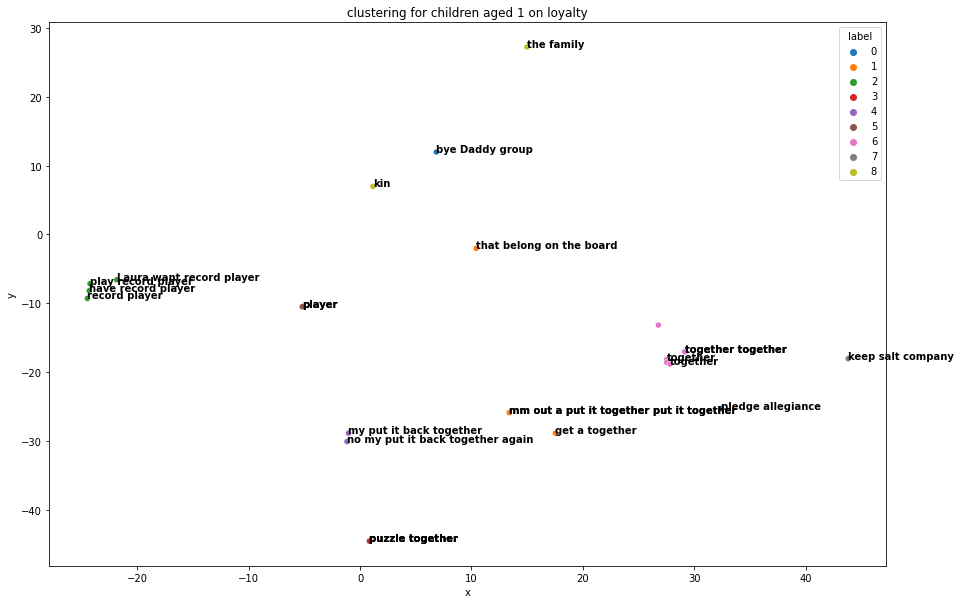

(3, 0.1352447)


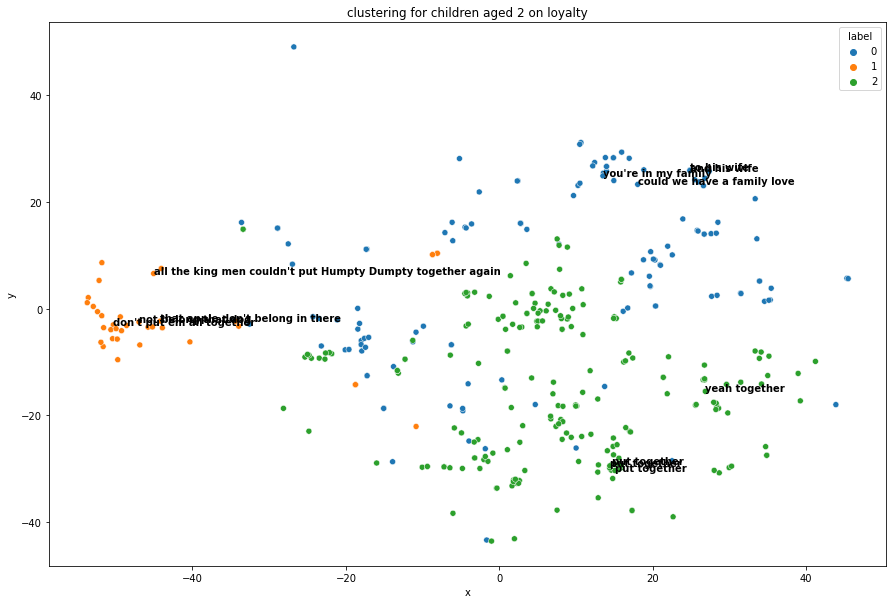

(4, 0.13136132)


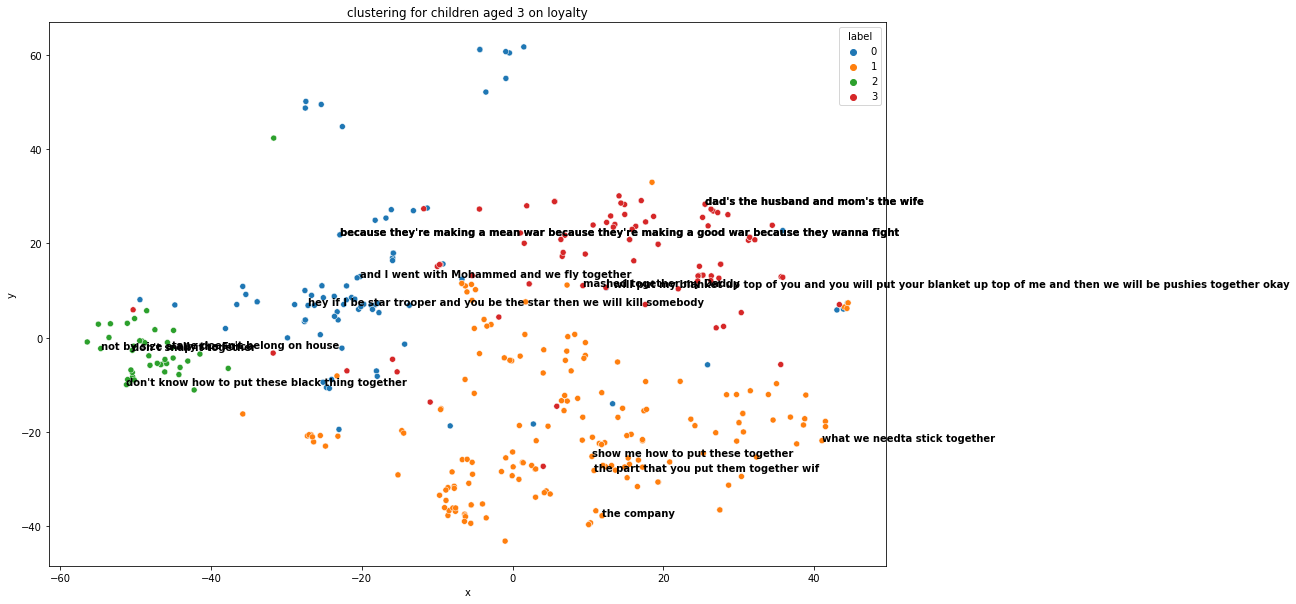

(7, 0.30066293)


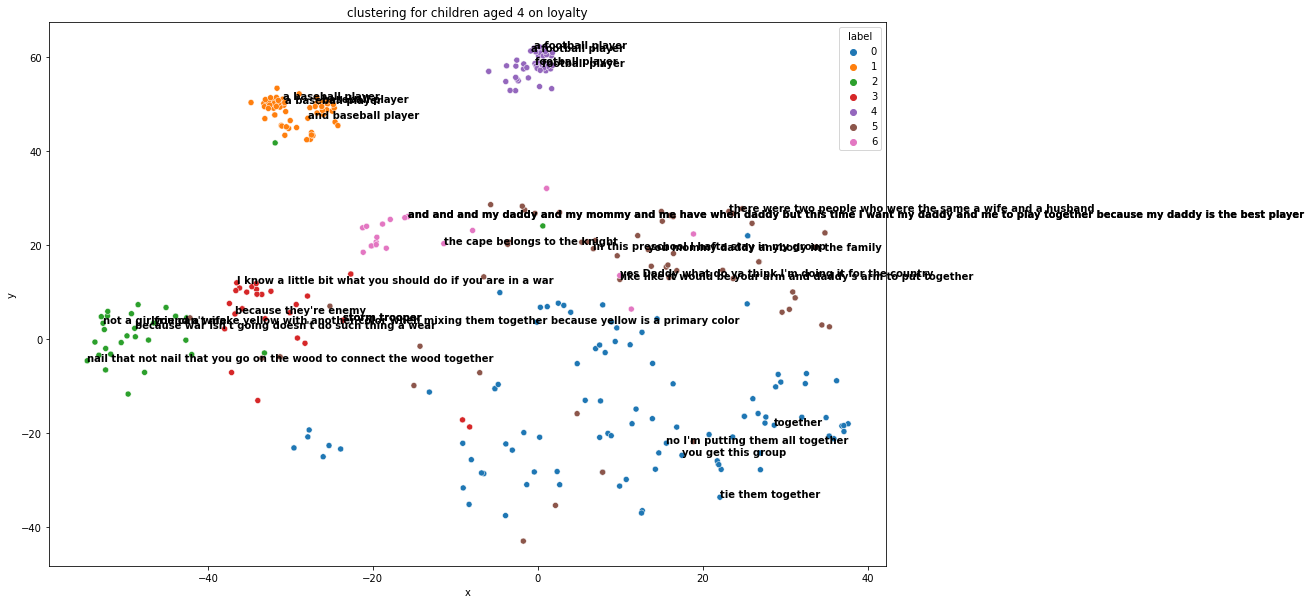

(3, 0.15978663)


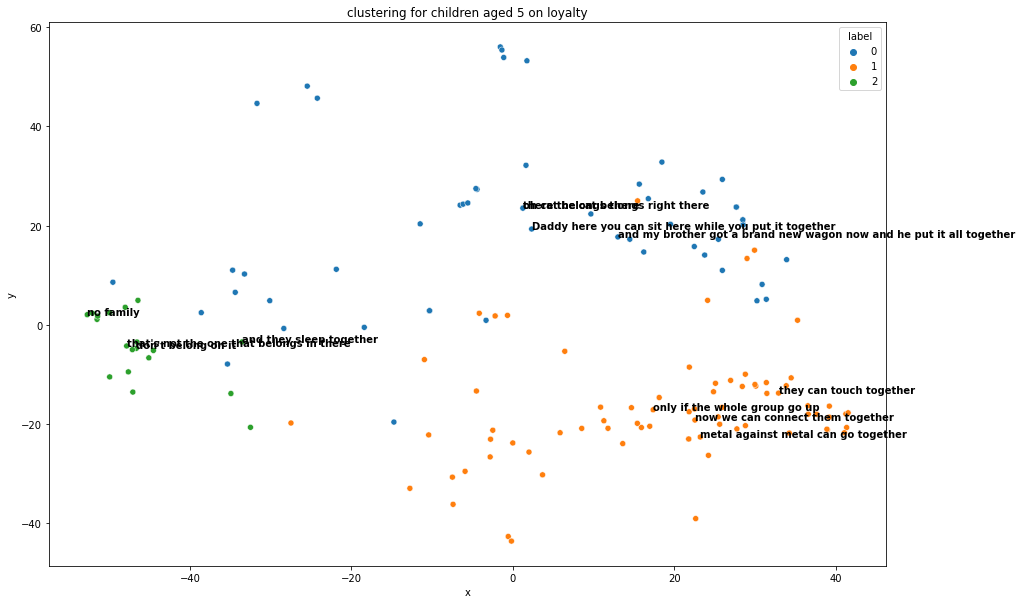

(9, 0.11768686)


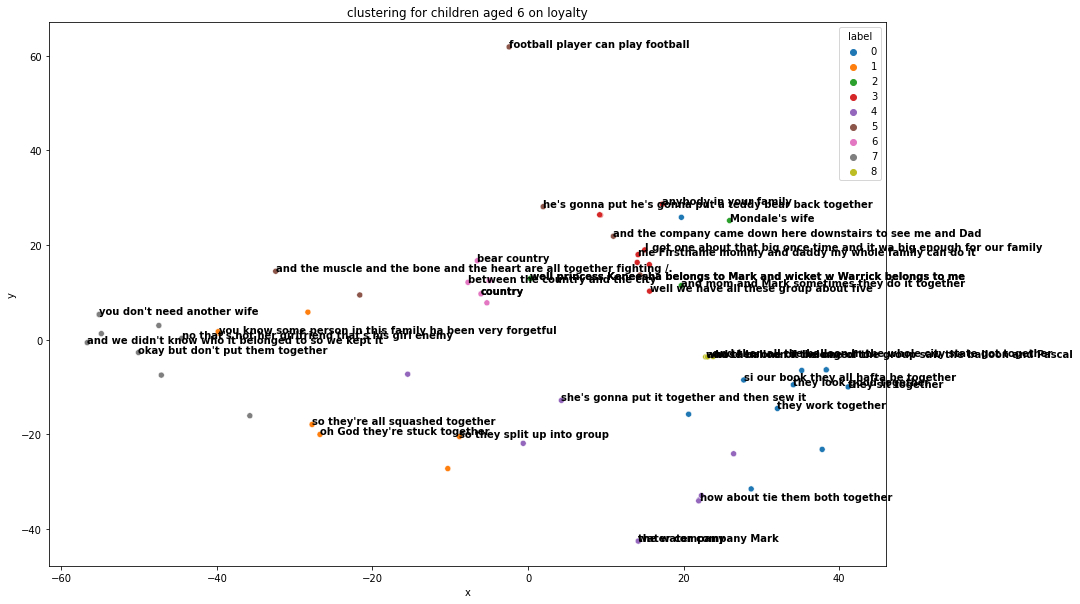

(9, 0.3586294)


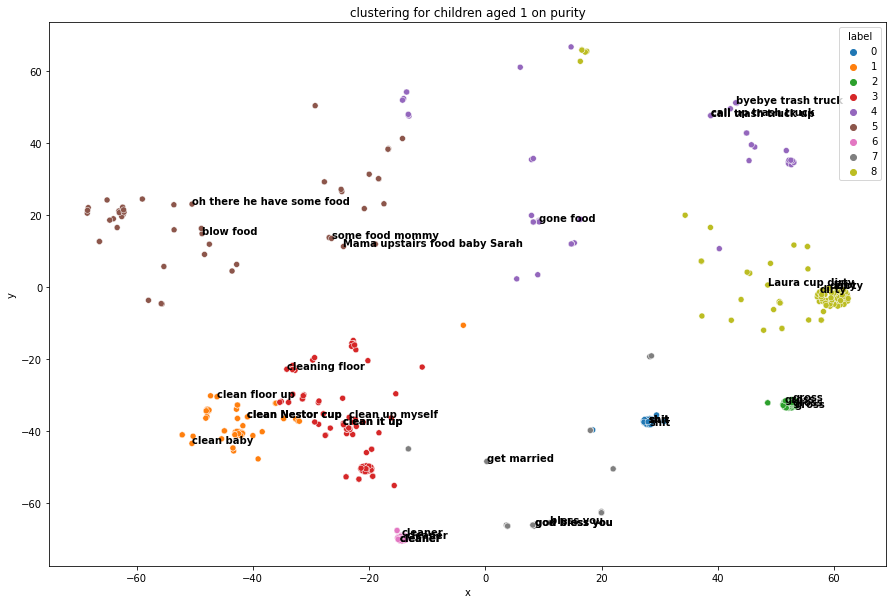

(9, 0.2081173)


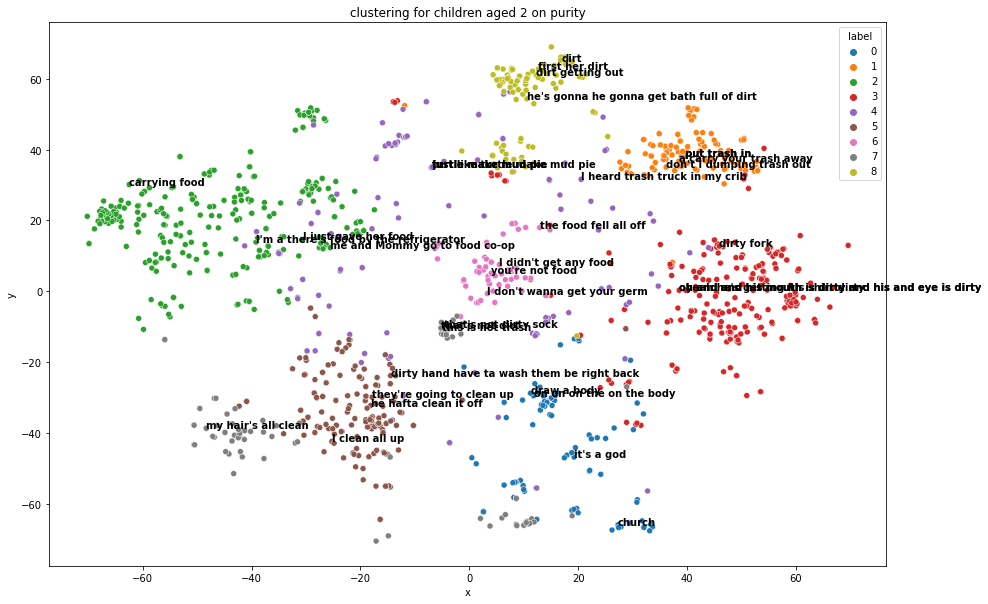

(6, 0.16369379)


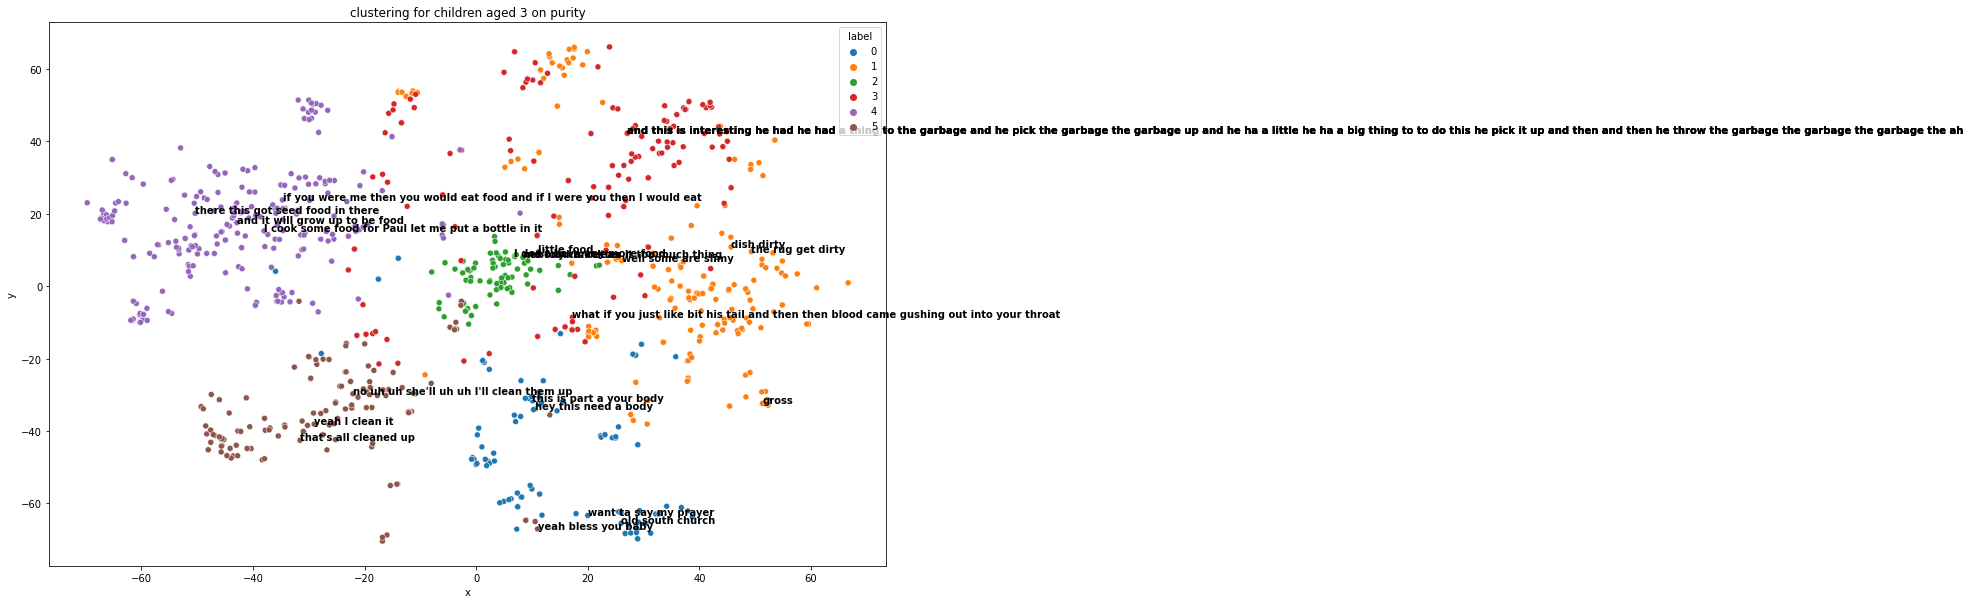

(3, 0.13869642)


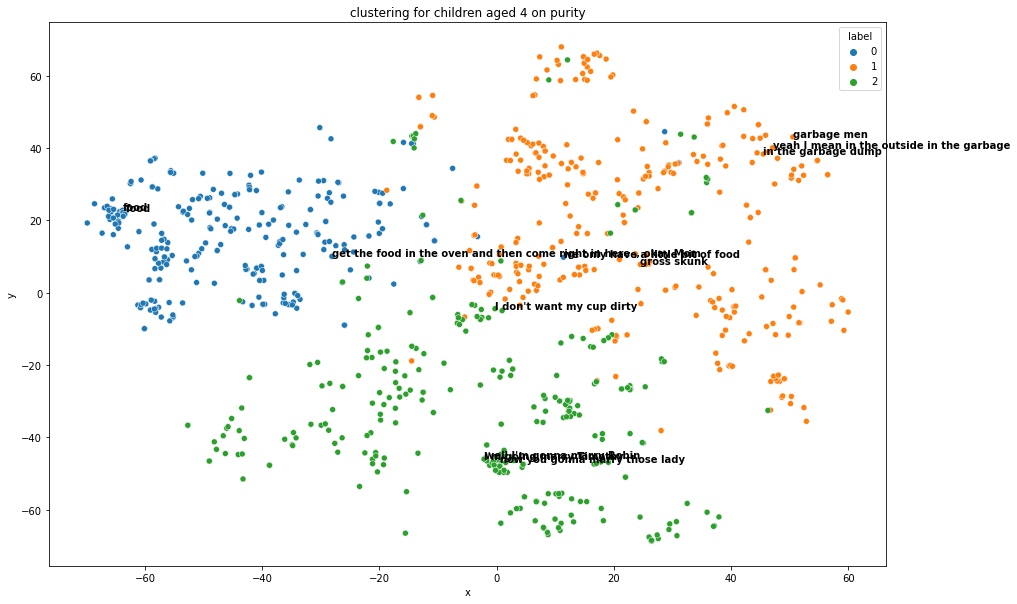

(6, 0.1546463)


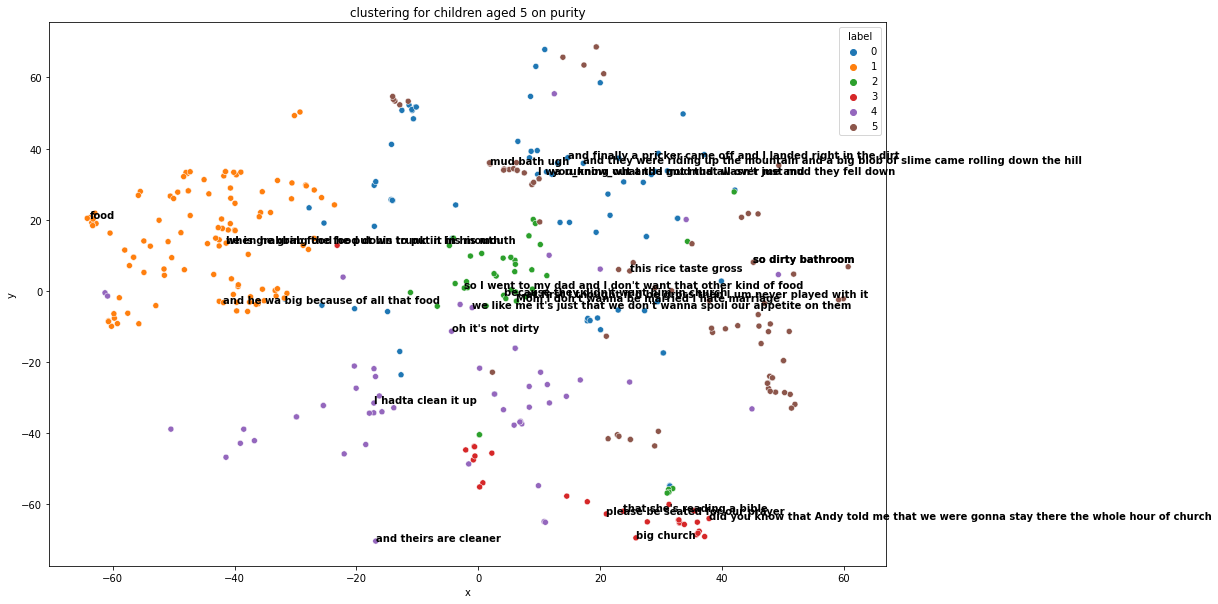

(8, 0.19595726)


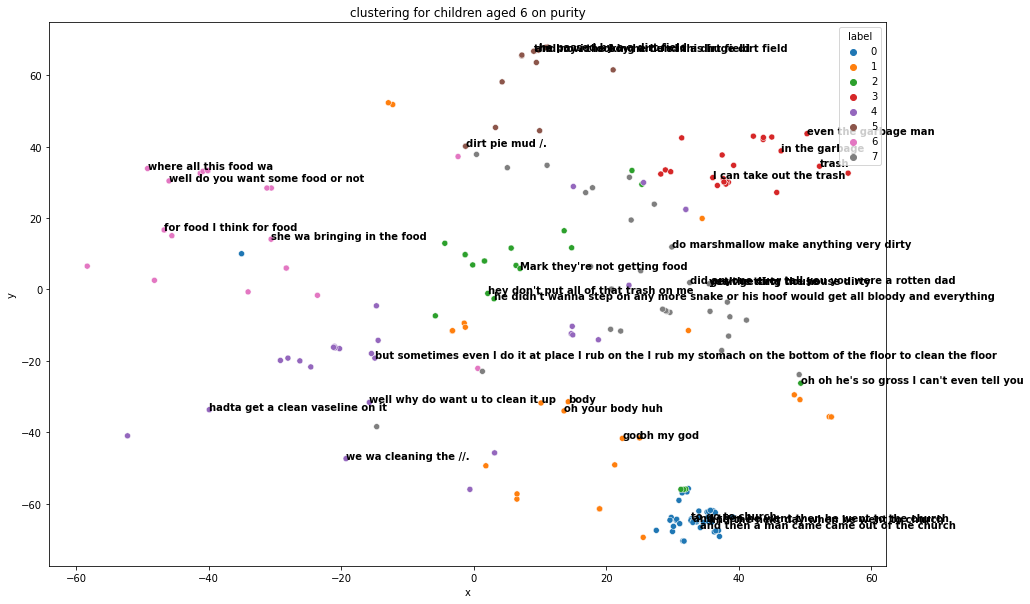

In [9]:
for c in categories:
    for age in ages:
        labels_utterances, probs, best_k, model = pickle.load(open(f'../data/{model_name}/{c}/{age}.pkl', 'rb'))
        print(best_k)
        df = get_df(labels_utterances)
        
        plot_clustering(df, age, c)
        
        

        
        
        
        

# GMM

In [10]:
model_name = 'GMM'

(6, 0.36084458)


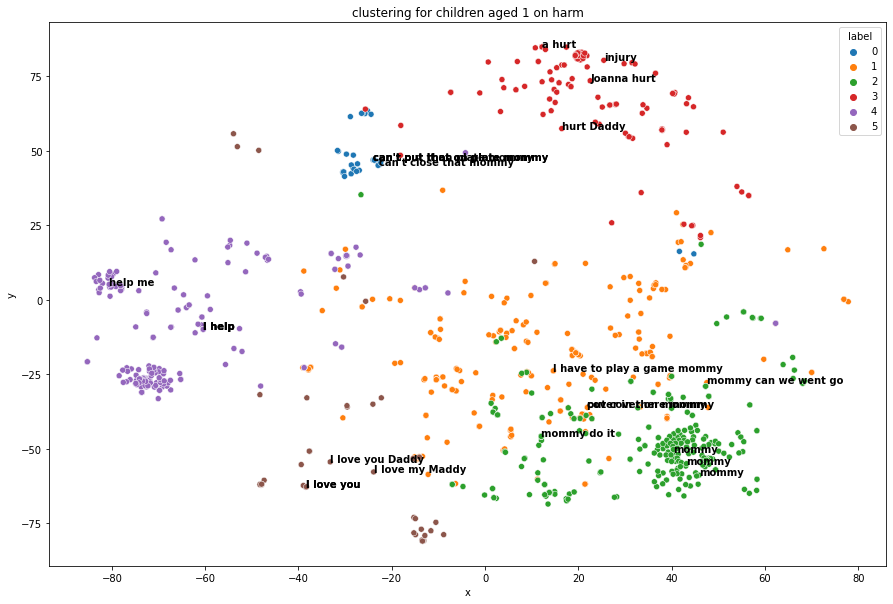

(6, 0.20536321)


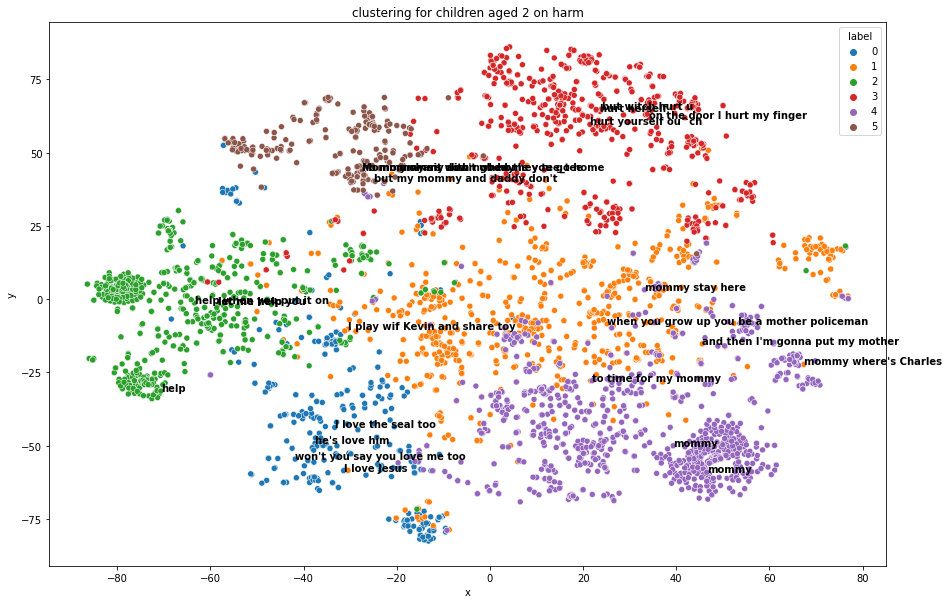

(4, 0.14770211)


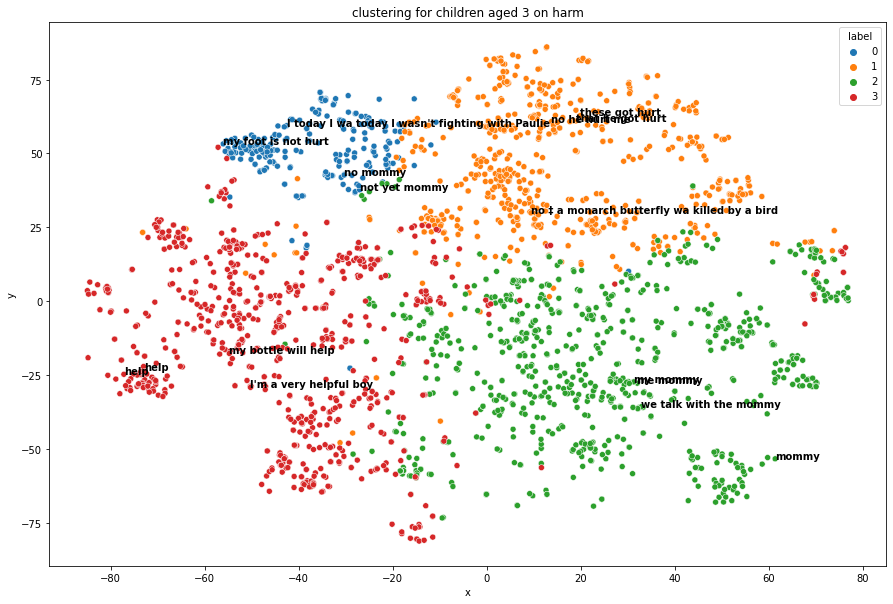

(10, 0.14630109)


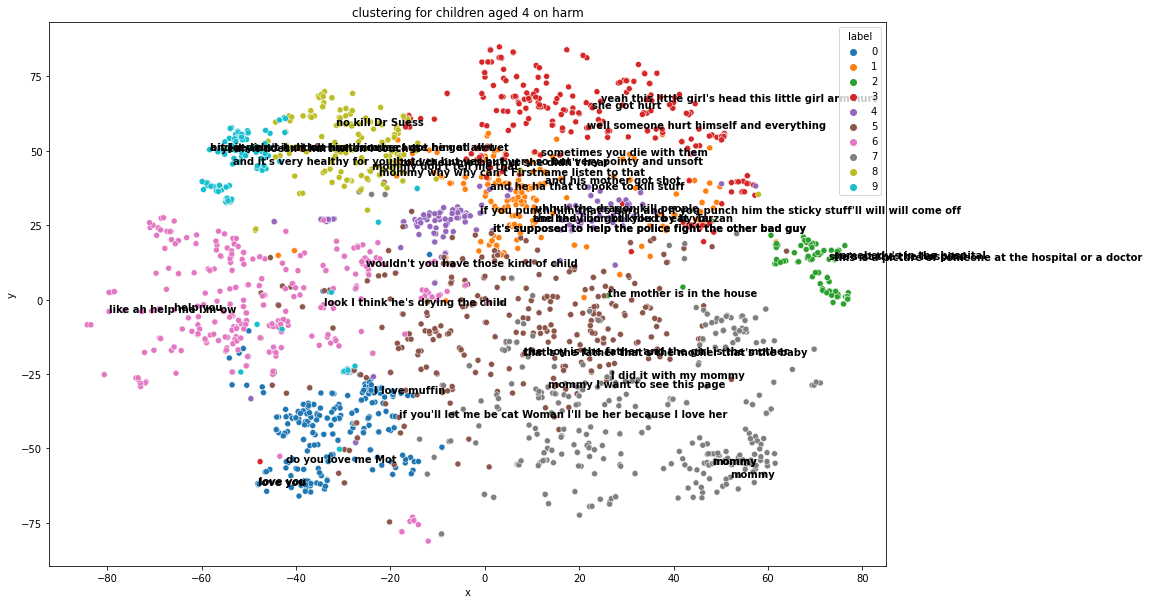

(5, 0.15978219)


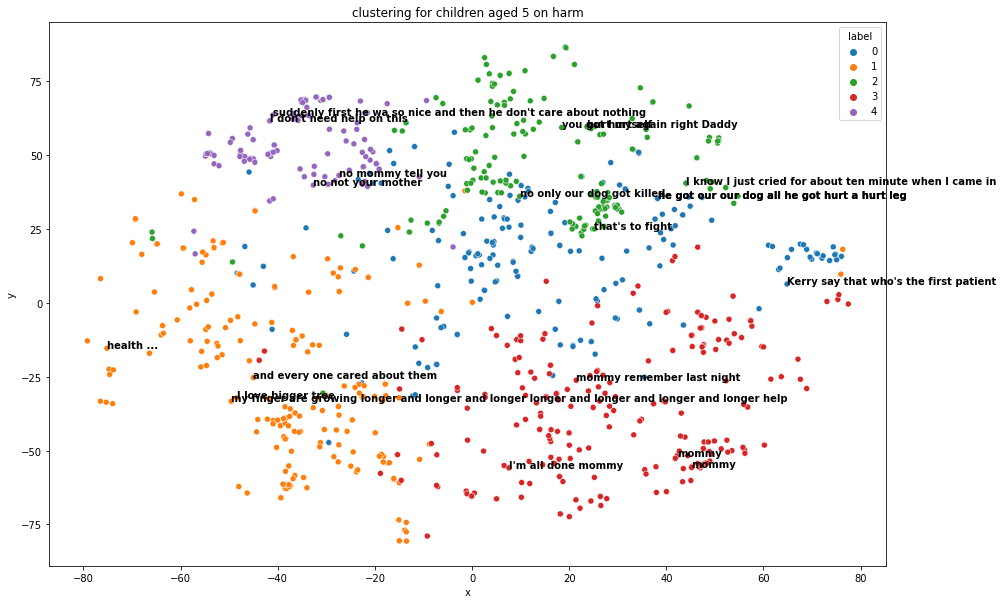

(8, 0.15815054)


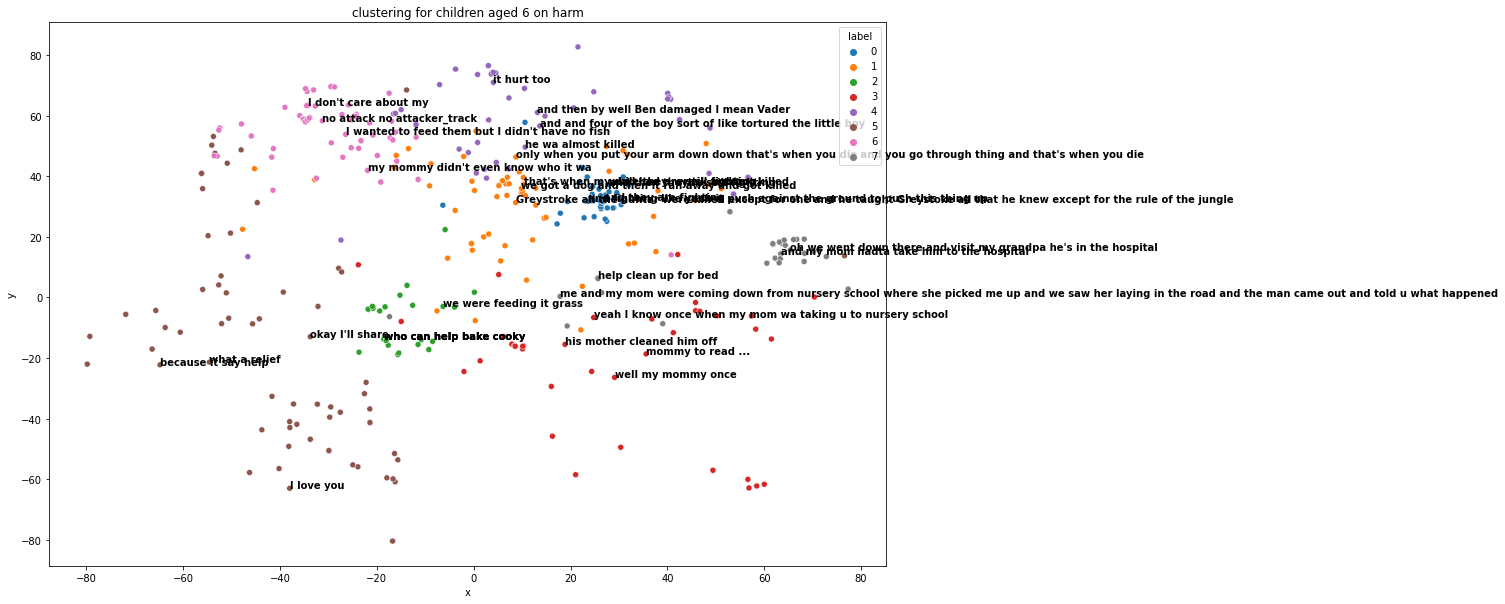

(2, 0.14815533)


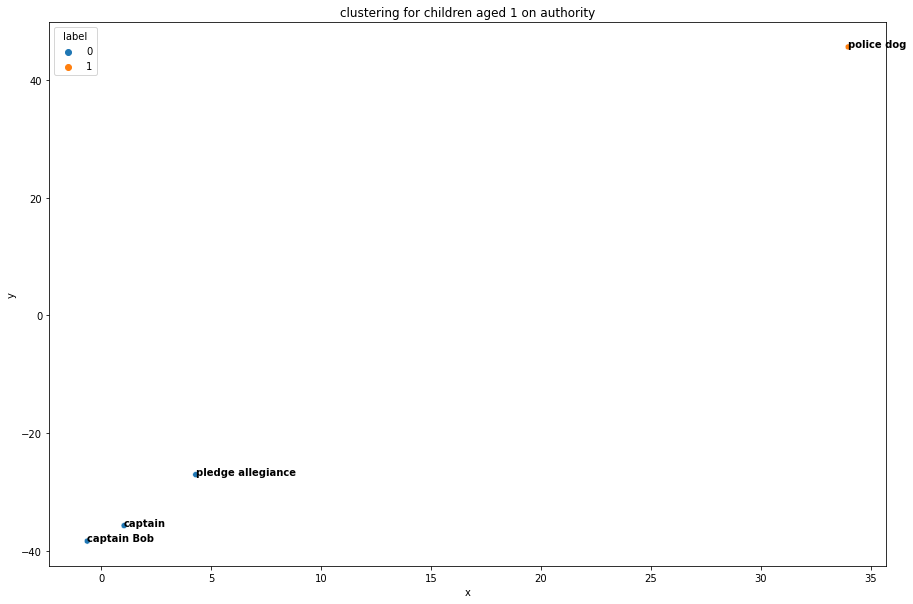

(5, 0.22532462)


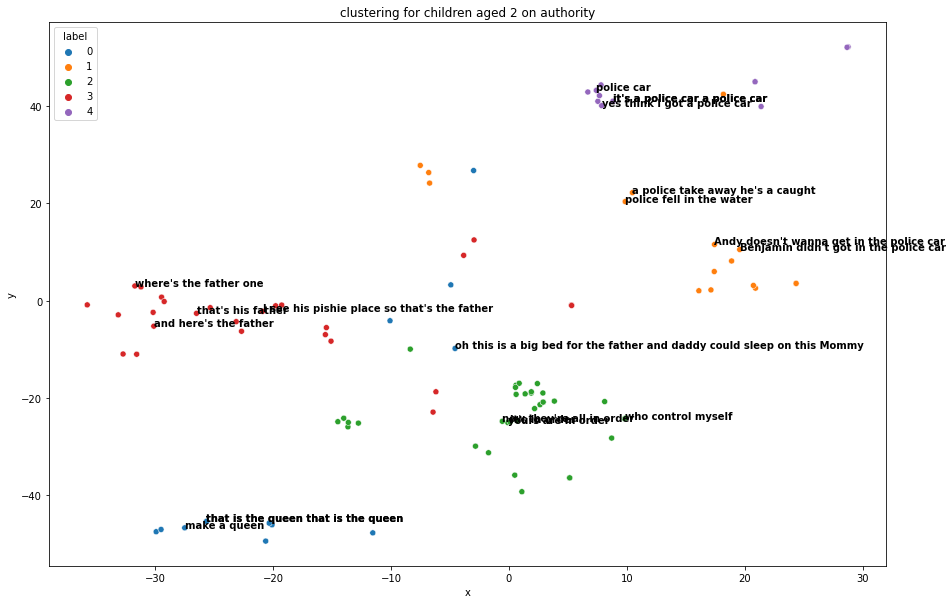

(10, 0.1744887)


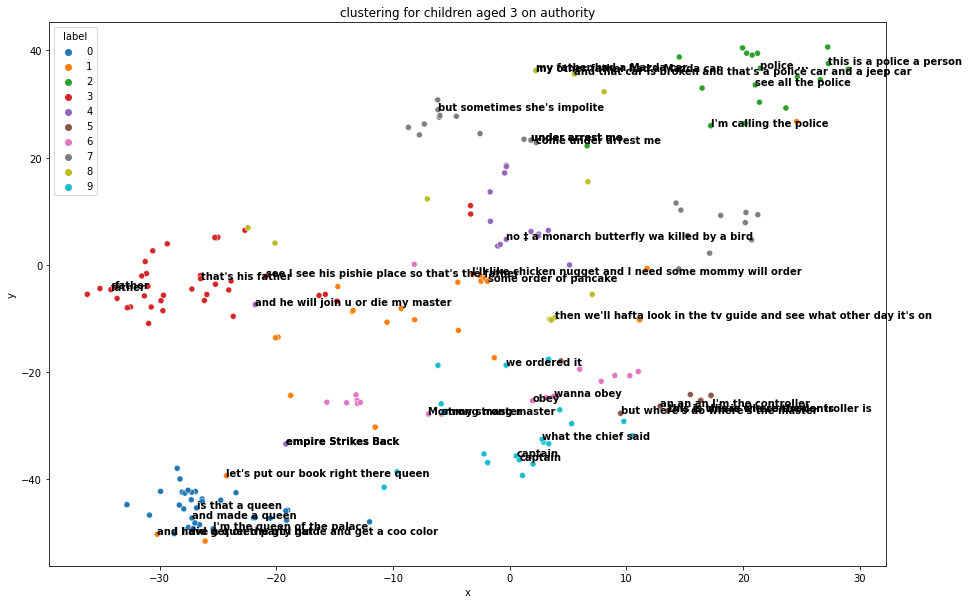

(2, 0.17299771)


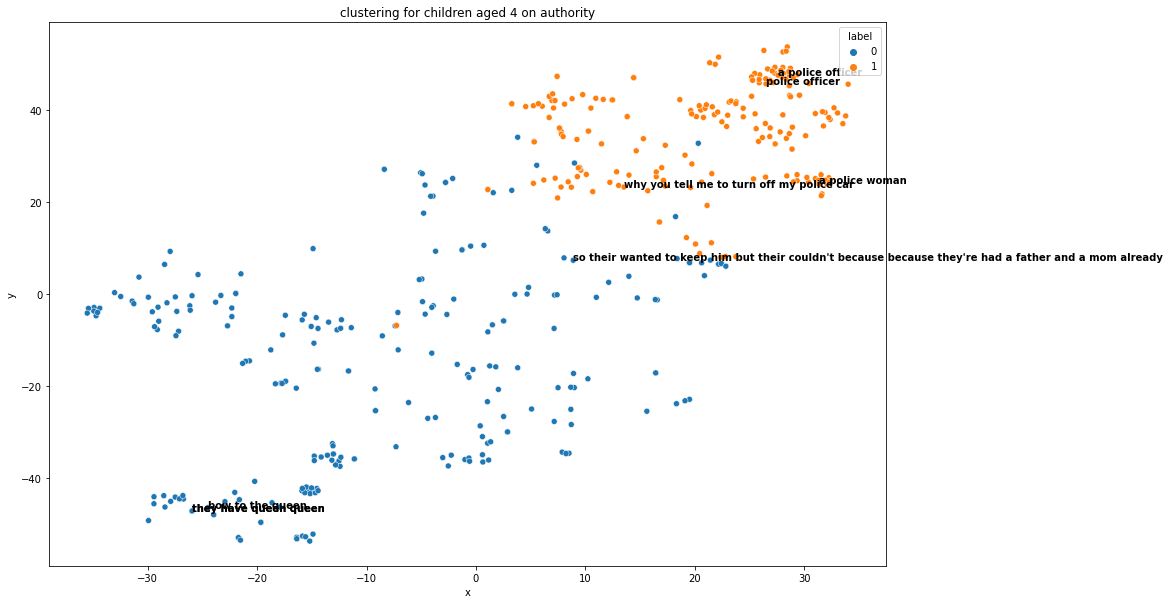

(8, 0.14665428)


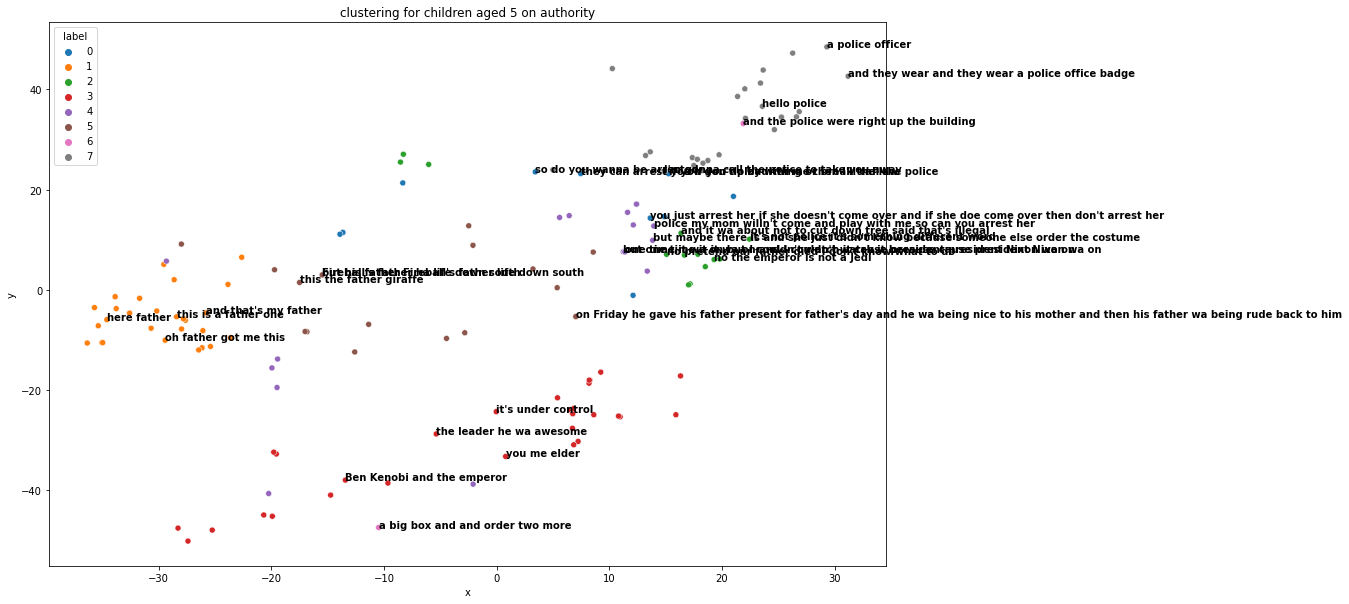

(3, 0.16743267)


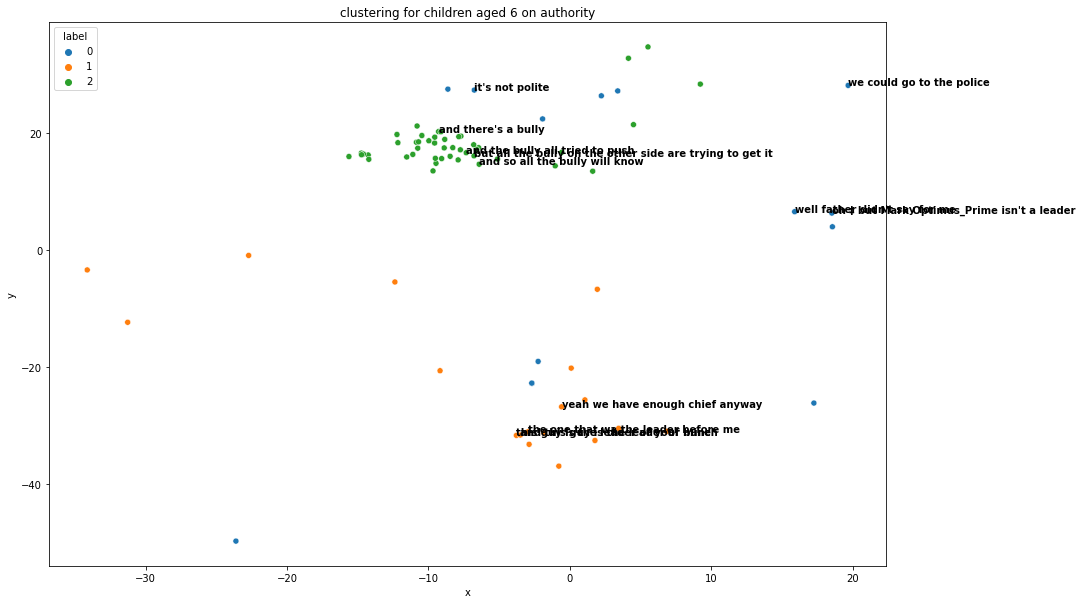

(5, 0.4591818)


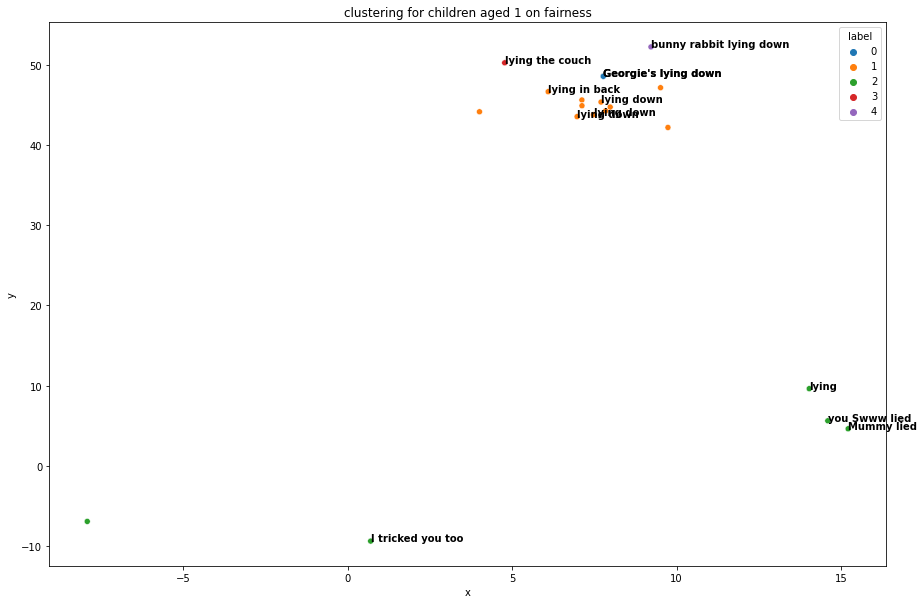

(5, 0.3409999)


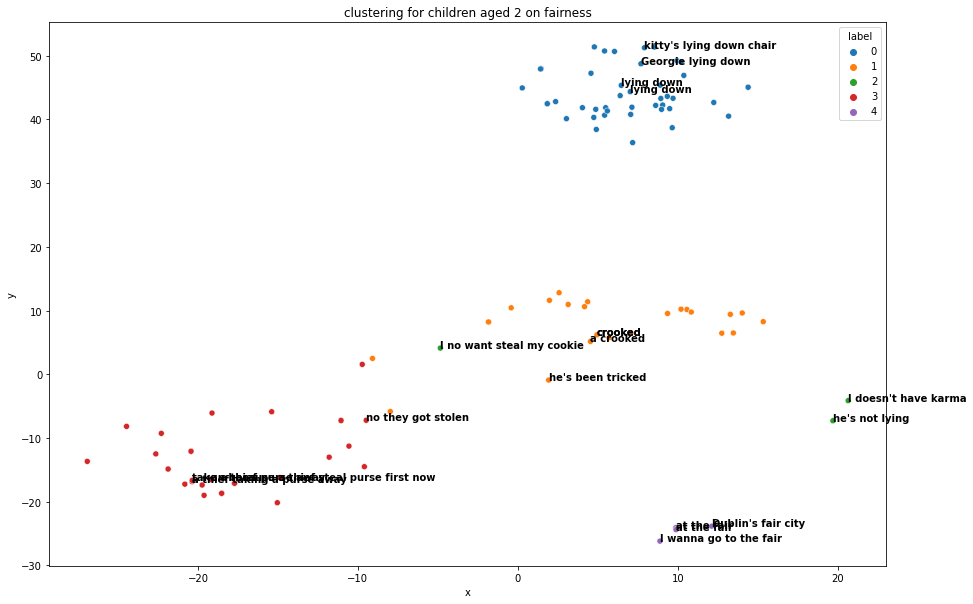

(9, 0.19580635)


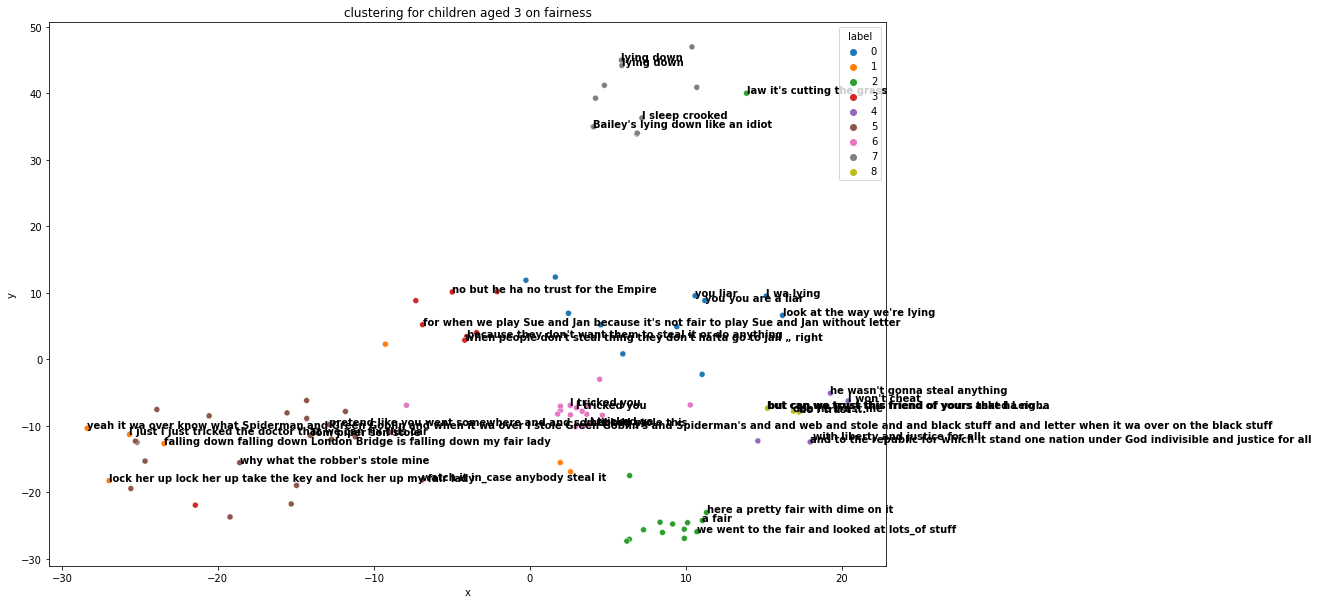

(5, 0.18324548)


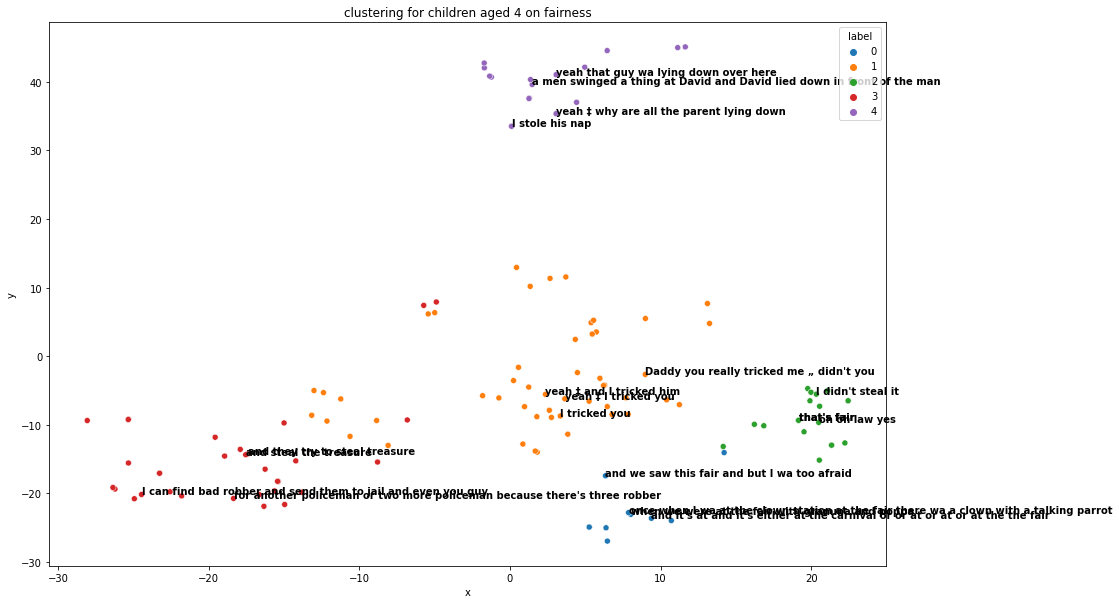

(10, 0.16543965)


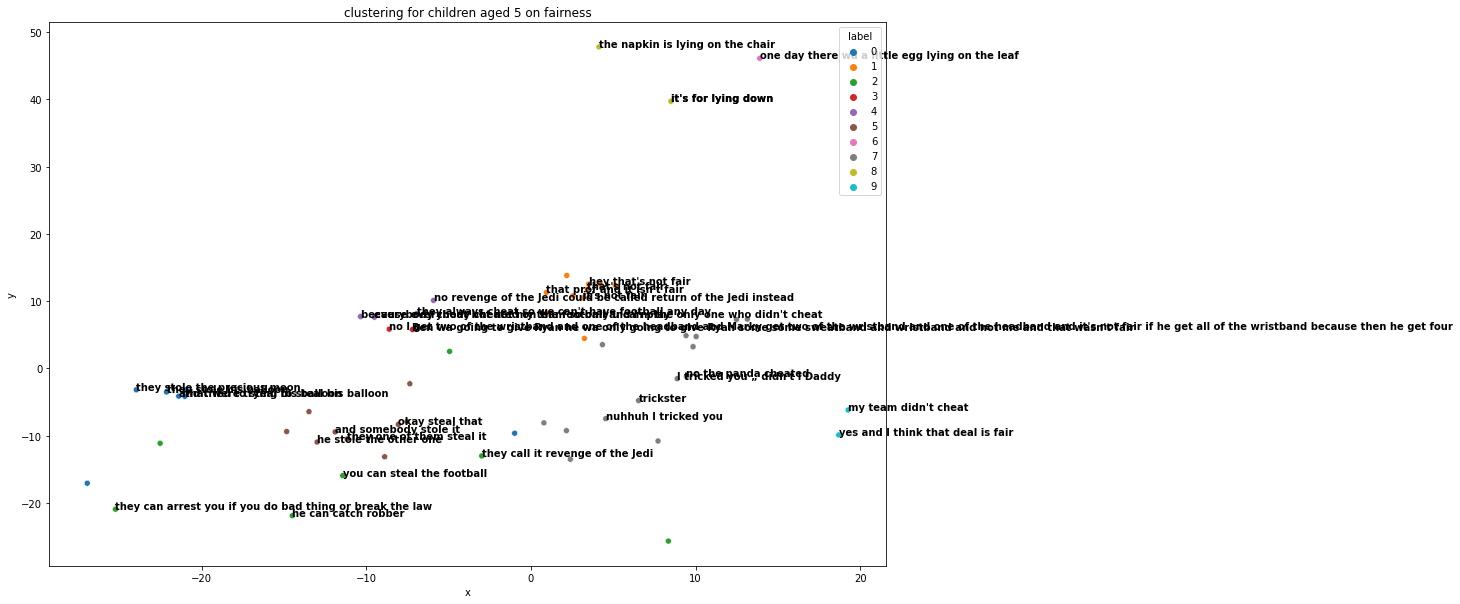

(10, 0.19314413)


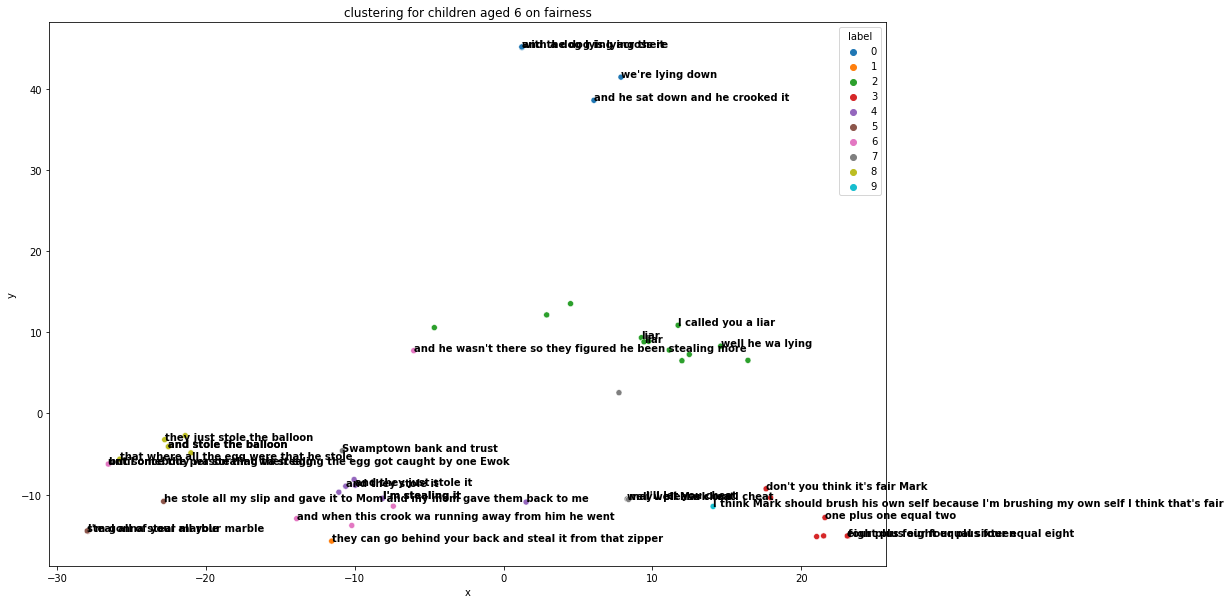

(10, 0.4561545)


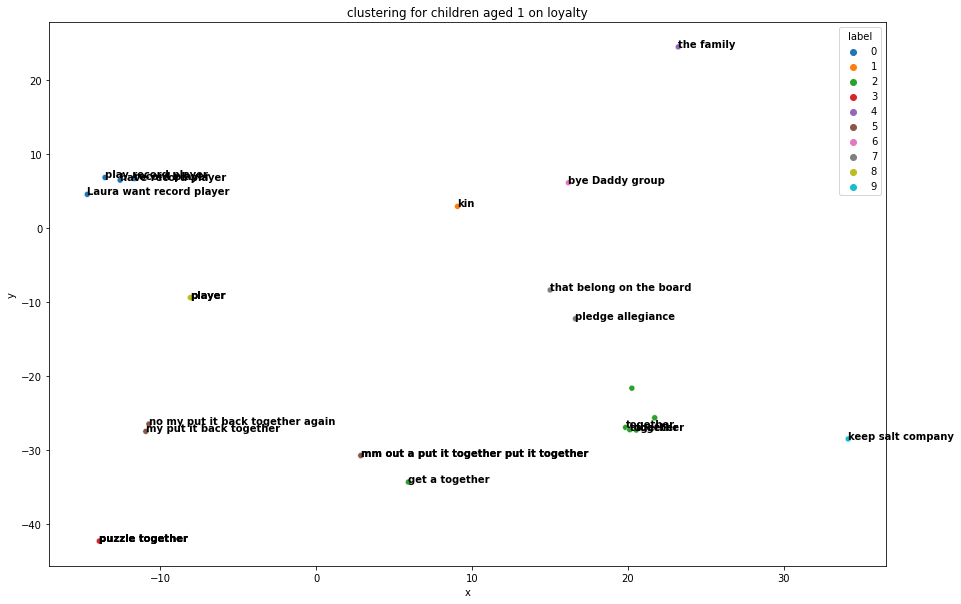

(2, 0.1262985)


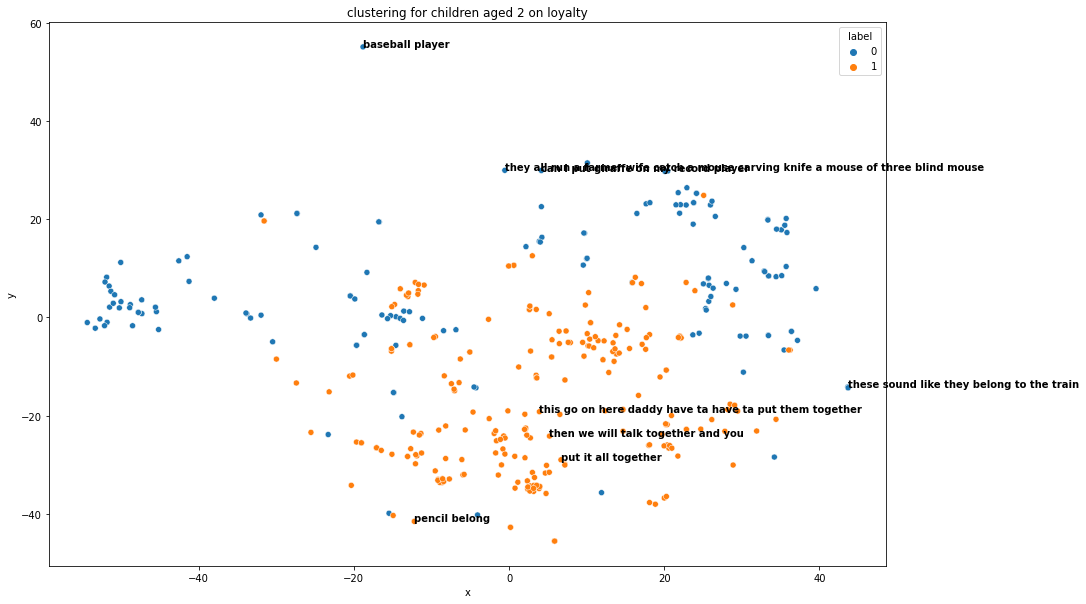

(4, 0.13024437)


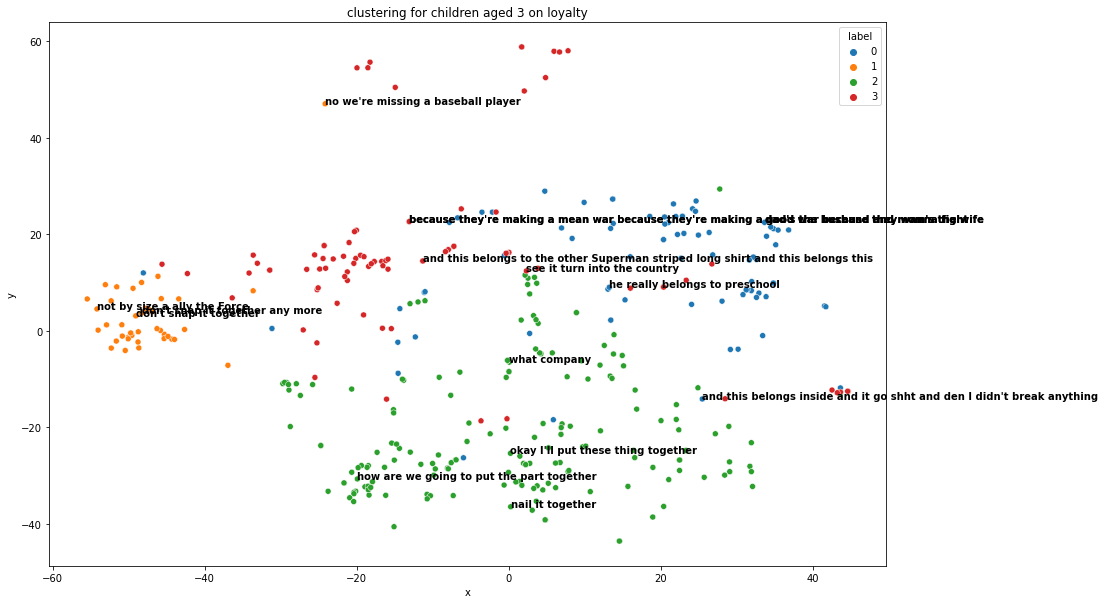

(6, 0.30037794)


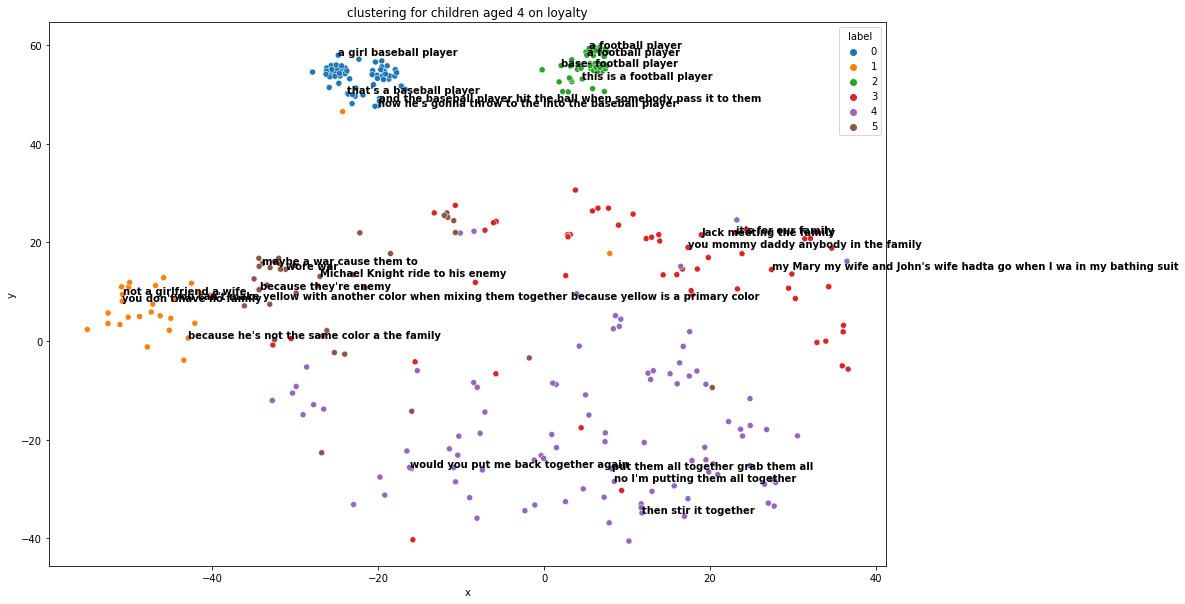

(4, 0.16477484)


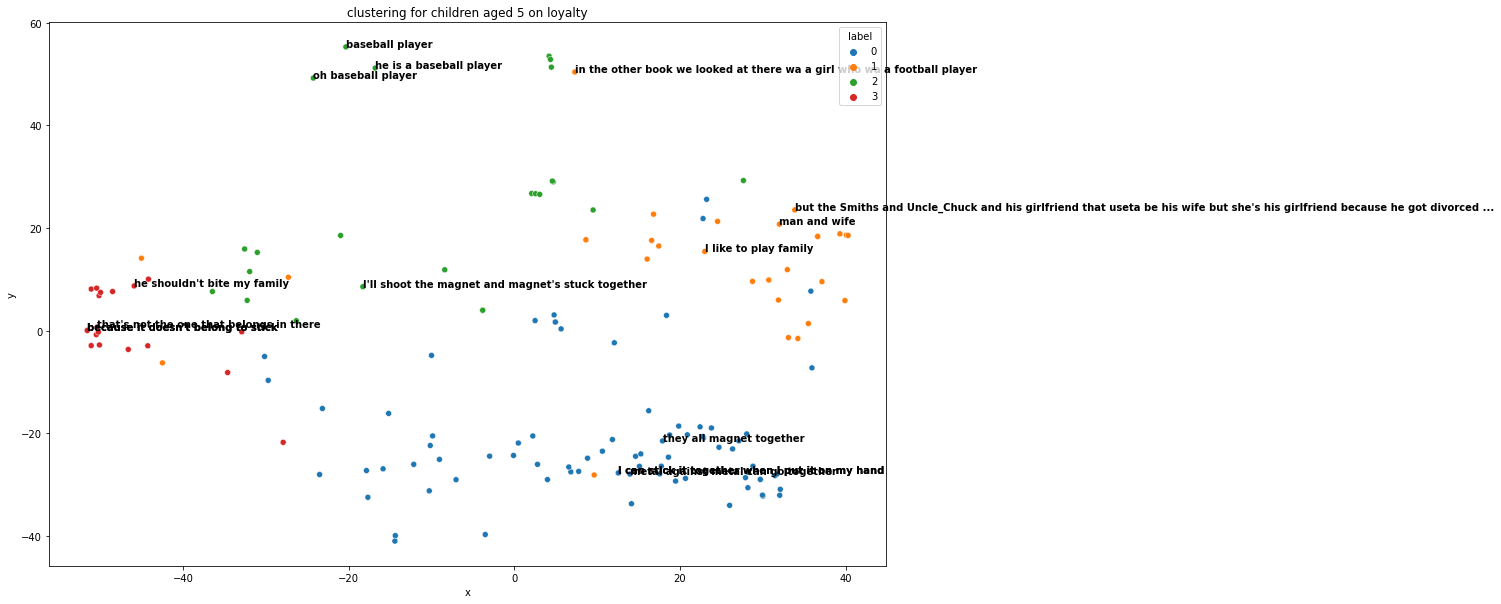

(10, 0.12557708)


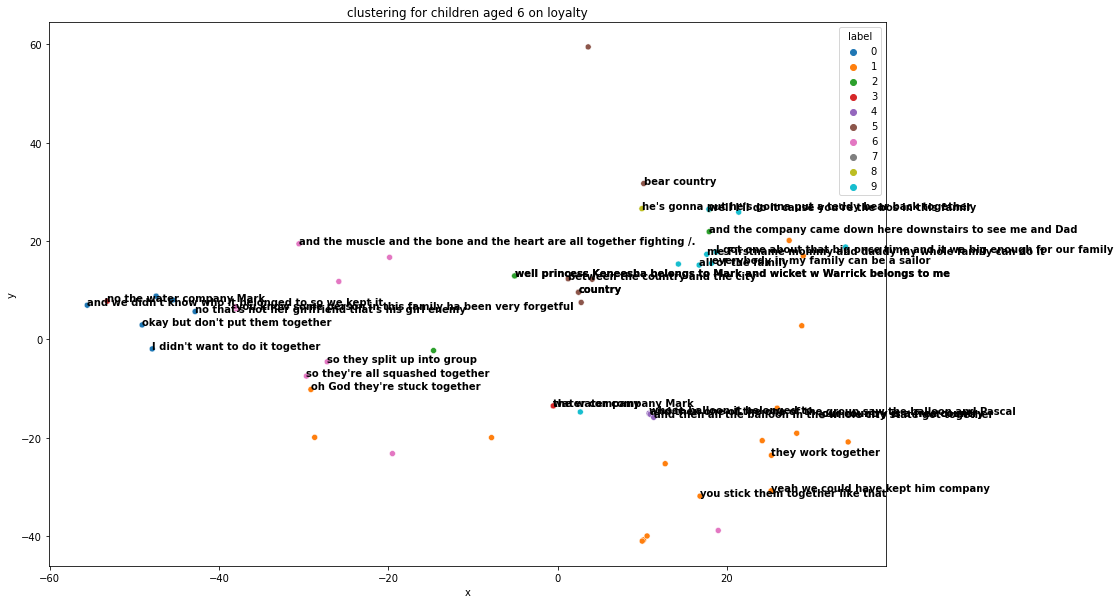

(10, 0.33831838)


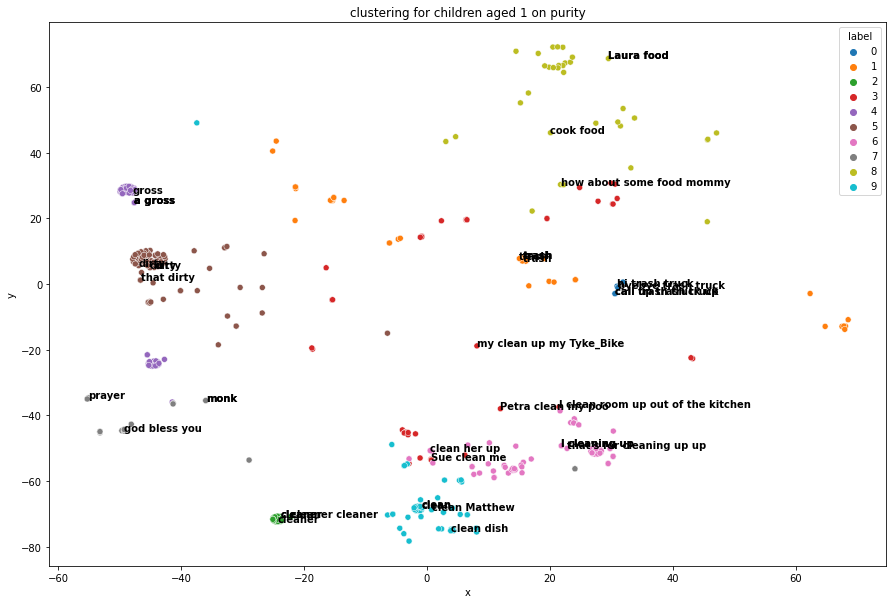

(8, 0.19596408)


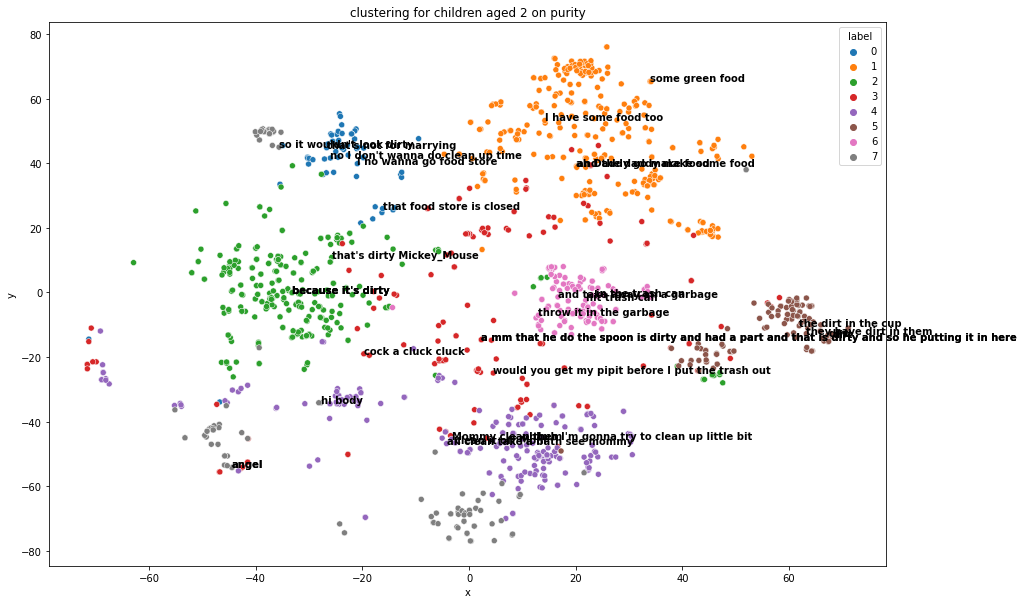

(3, 0.15406093)


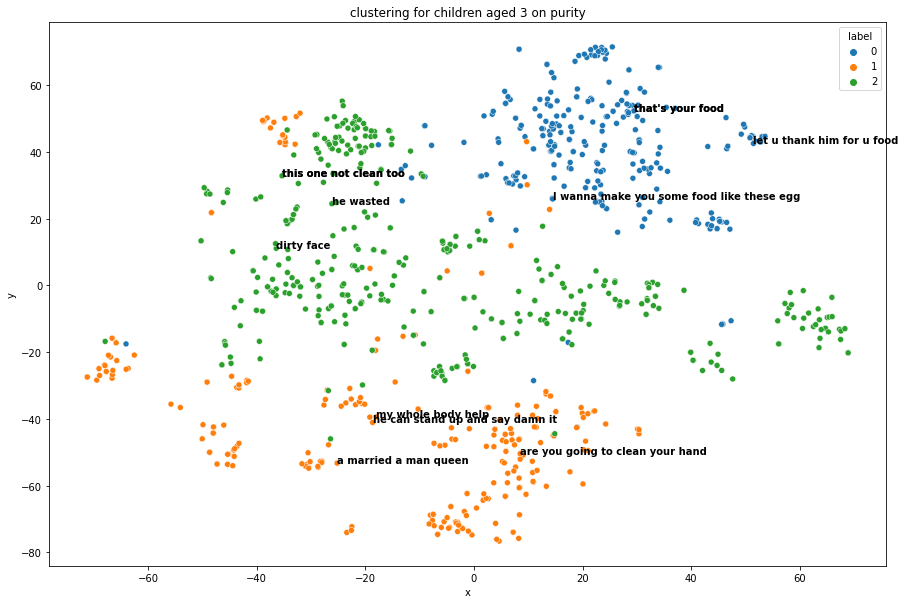

(9, 0.14468195)


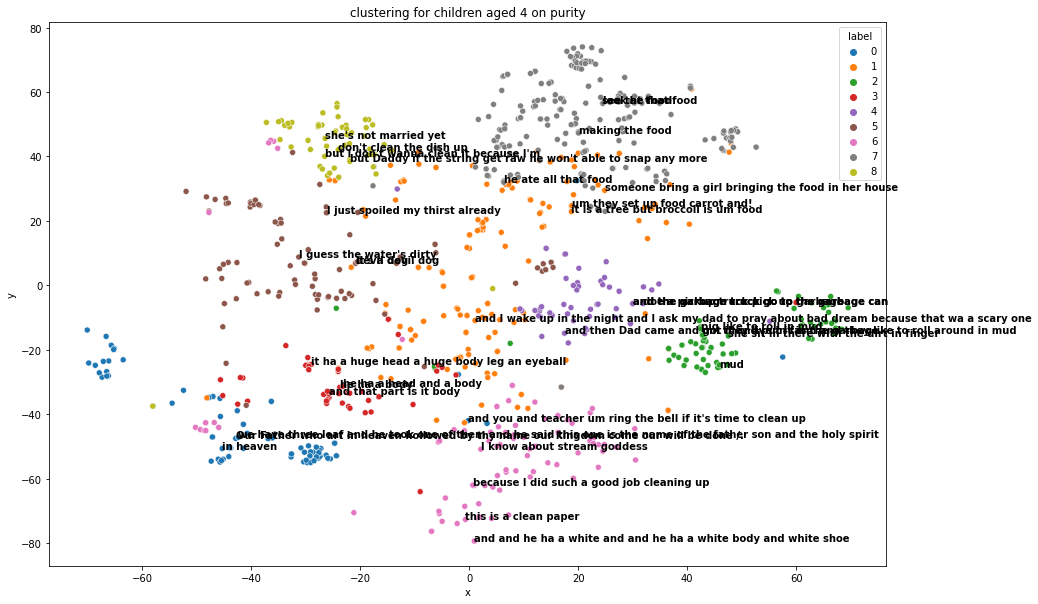

(3, 0.14844203)


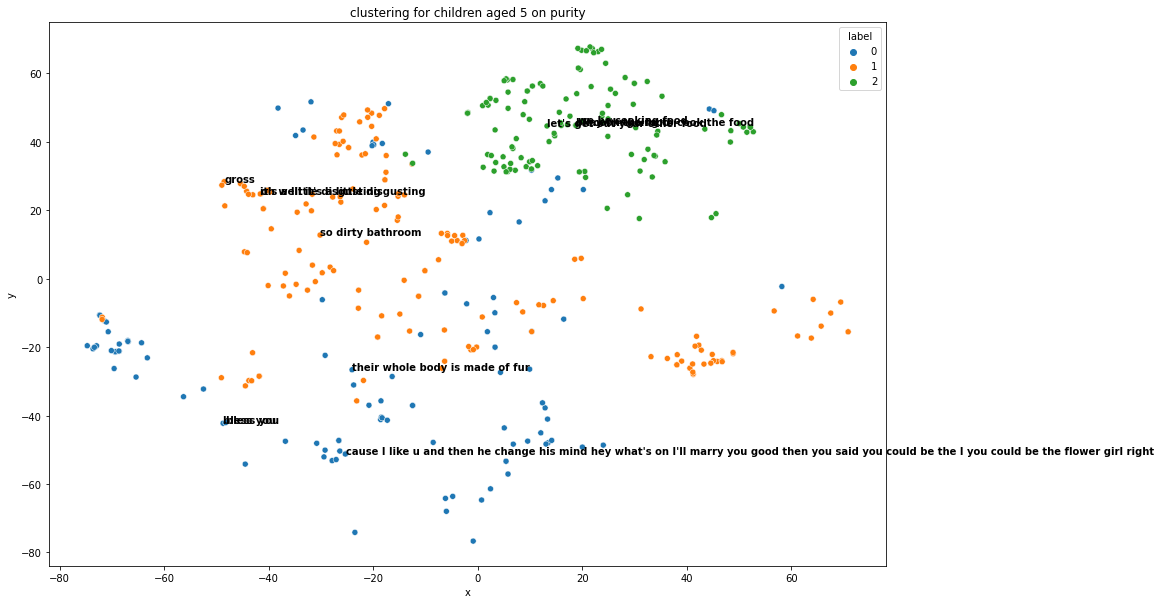

(10, 0.1866364)


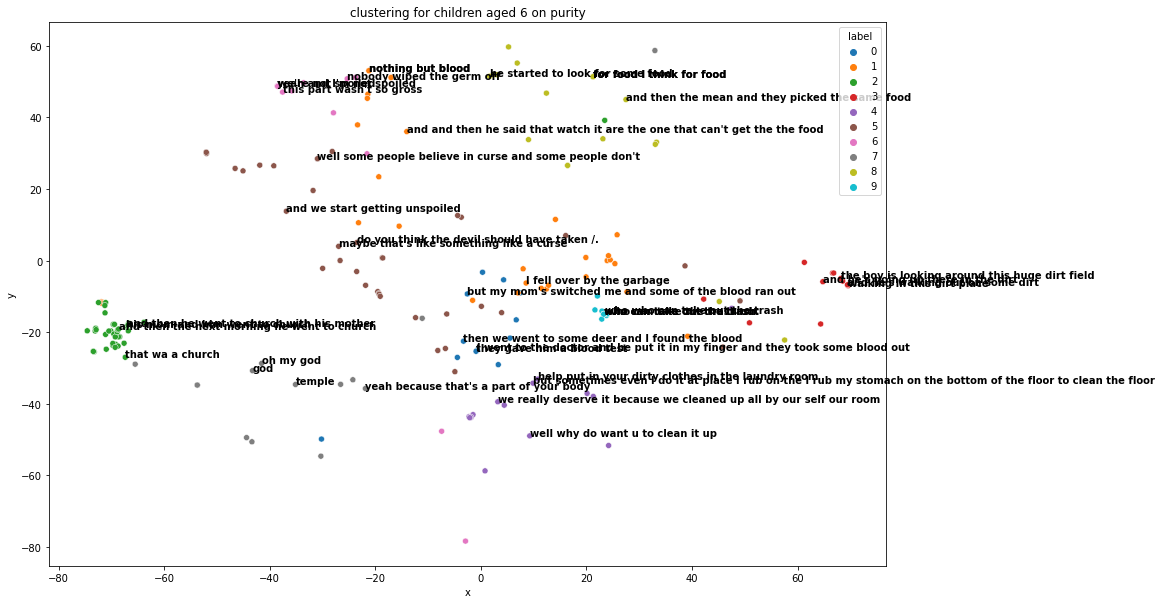

In [11]:
for c in categories:
    for age in ages:
        labels_utterances, probs, best_k, model = pickle.load(open(f'../data/{model_name}/{c}/{age}.pkl', 'rb'))
        print(best_k)
        df = get_df(labels_utterances)
        
        plot_clustering(df, age, c)
        